In [1]:
import numpy as np
import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import py21cmfast as p21c
import h5py
import EdgeFinding3dWorkingClass
import intensity_tool
from importlib import reload
import time
import pickle
import EdgeFinding3d072622
import lya_pol_box

reload(EdgeFinding3dWorkingClass)
reload(lya_pol_box)

<module 'lya_pol_box' from '/users/PCON0003/osu10670/Lya-Pol/lya_pol_box.py'>

In [2]:
parsec=3.085677581e16
H_0=67.74e3/(parsec*10**6) # in units of s^-1, Hubble constants now, 67.74 km/s/mpc
Omega_m=0.3089 # Omega_m = 0.3089+-0.0062
G=6.674e-11  #6.674×10−11 m3*kg−1*s−2 ### 4.30091(25)×10−3 pc*M_solar-1*(km/s)^2
solar_m= 1.98847e30 #(1.98847±0.00007)×10^30 kg
mH_kg = 1.67e-27 # hydrogen mass , kg
rho_c=3*H_0**2/8/np.pi/G # kg/m^3
rho_c *Omega_m / mH_kg / 1000000

1.5943582896874733e-06

In [3]:
# directory = '/fs/scratch/PCON0003/emily/21cmFAST-cache/21cmFAST-cache/200box'
directory = '/fs/scratch/PCON0003/emily/21cmcacheold'
redshift = 8
boxes = lya_pol_box.load_boxes(directory, redshift)

In [4]:
boxes.xH_box.shape

(100, 100, 100)

In [5]:
T_bb = 47834.5 # Kelvin
intensity_box = lya_pol_box.get_intensity(redshift, T_bb, boxes.xH_box, boxes.gamma12_box, boxes.deltam_box)

In [8]:
t_start = time.time()
fronts_finder = lya_pol_box.fronts_finder(boxes.xH_box, boxes.gamma12_box)
pairs, lines = fronts_finder.get_pair_line(fronts_finder.edge)
fronts, uni_center = fronts_finder.get_front(fronts_finder.edge,pairs,lines)

t_end = time.time()
print('It take %.2f seconds to extract fronts.' % (t_end - t_start))



Extracting fronts in slice 0 out of 100
Extracting fronts in slice 1 out of 100
Extracting fronts in slice 2 out of 100
Extracting fronts in slice 3 out of 100
Extracting fronts in slice 4 out of 100
Extracting fronts in slice 5 out of 100
Extracting fronts in slice 6 out of 100
Extracting fronts in slice 7 out of 100
Extracting fronts in slice 8 out of 100
Extracting fronts in slice 9 out of 100
Extracting fronts in slice 10 out of 100
Extracting fronts in slice 11 out of 100
Extracting fronts in slice 12 out of 100
Extracting fronts in slice 13 out of 100
Extracting fronts in slice 14 out of 100
Extracting fronts in slice 15 out of 100
Extracting fronts in slice 16 out of 100
Extracting fronts in slice 17 out of 100
Extracting fronts in slice 18 out of 100
Extracting fronts in slice 19 out of 100
Extracting fronts in slice 20 out of 100
Extracting fronts in slice 21 out of 100
Extracting fronts in slice 22 out of 100
Extracting fronts in slice 23 out of 100
Extracting fronts in slice

/users/PCON0003/osu10670/Lya-Pol/EdgeFinding3dWorkingClass.py:472: RuntimeWarning: invalid value encountered in true_divide
  nhat = nfull/np.sqrt(nfull[0]**2 + nfull[1]**2 +nfull[2]**2)
/users/PCON0003/osu10670/Lya-Pol/EdgeFinding3dWorkingClass.py:459: RuntimeWarning: invalid value encountered in sqrt
  area1 = np.sqrt(s*(s-a)*(s-b)*(s-c))


It take 59.75 seconds to extract fronts.


In [7]:
len(fronts)

580907

In [9]:
with open('fronts_100box.pkl','wb') as f:
    pickle.dump(fronts, f)

In [6]:
with open('fronts_100box.pkl','rb') as f:
    fronts = pickle.load(f)

In [ ]:
len(boxes.xH_box[0])

In [ ]:
centers = np.array([front.center for front in fronts])
uni_center,uni_index = np.unique(centers,axis=0,return_index=True)
fronts = fronts[uni_index]

In [7]:
gamma12_locs, gamma12_vals = intensity_box.get_gamma(intensity_box.edge, fronts)

In [ ]:
gamma12_locs_test = EdgeFinding3d072622.findGamma12Loc(fronts, boxes.xH_box, len(boxes.xH_box), boxes.gamma12_box)

In [ ]:
gamma12_locs,gamma12_vals

In [ ]:
gamma12_locs.T[2]

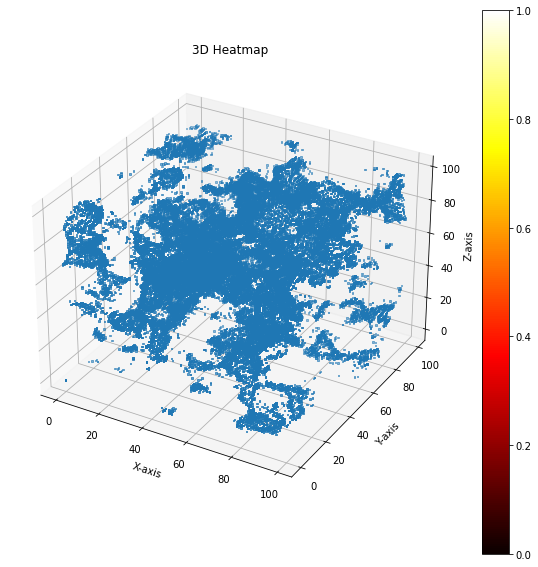

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
  
# creating a dummy dataset
x = gamma12_locs.T[0]
y = gamma12_locs.T[1]
z = gamma12_locs.T[2]
colo = gamma12_vals
  
# creating figures
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
  
# setting color bar
color_map = cm.ScalarMappable(cmap=cm.hsv)
color_map.set_array(colo)
  
# creating the heatmap
img = ax.scatter(x, y, z, marker='s',
                 s=2, cmap=plt.hot())
plt.colorbar(img)
  
# adding title and labels
ax.set_title("3D Heatmap")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
  
# displaying plot
plt.show()

In [ ]:
gamma12_locs.shape, uni_center.shape

In [ ]:
Out[10]

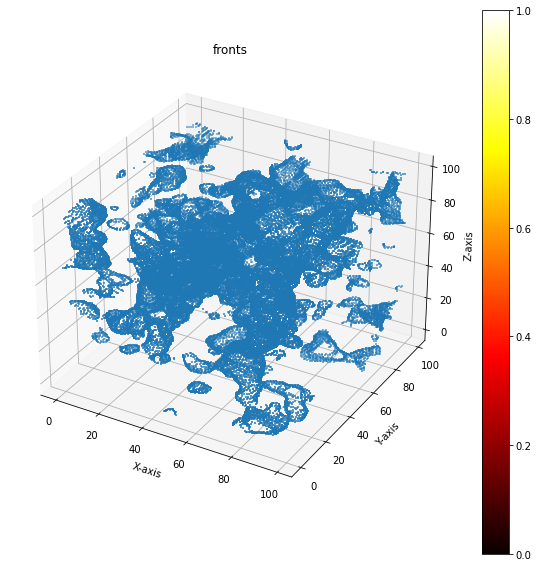

In [13]:

x = uni_center.T[0]
y = uni_center.T[1]
z = uni_center.T[2]
colo = gamma12_vals
  
# creating figures
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
  
# setting color bar
color_map = cm.ScalarMappable(cmap=cm.hsv)
color_map.set_array(colo)
  
# creating the heatmap
img = ax.scatter(x, y, z, marker='s',
                 s=1, cmap=plt.hot())
plt.colorbar(img)
  
# adding title and labels
ax.set_title("fronts")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
  
# displaying plot
plt.show()

In [ ]:
gamma12_locs[:50]

In [ ]:
gamma12_val,vertex1,vertex2,vertex3,center, nhat,A_Mpc2,N

In [ ]:
points, p_edge, p_corner, p_interior

In [ ]:
areas = []
for front in fronts:
    areas.append(front.area)

In [ ]:
for i in range(500000):
    gamma12_val = gamma12_vals[i]
    vertex1, vertex2, vertex3, center, nhat, A_Mpc2 = intensity_box.get_triangle_geometry(fronts[i])
    N = intensity_box.get_N_split(vertex1, vertex2, vertex3)
    points, p_edge, p_corner, p_interior = intensity_box.point_classifier(vertex1, vertex2, vertex3)
    if N > 2:
        print(i)
#         N,points, p_edge, p_corner, p_interior

In [25]:
i=9
gamma12_vagamma12_val = gamma12_vals[i]
vertex1, vertex2, vertex3, center, nhat, A_Mpc2 = intensity_box.get_triangle_geometry(fronts[i])
N = intensity_box.get_N_split(vertex1, vertex2, vertex3)
points, p_edge, p_corner, p_interior = intensity_box.point_classifier(vertex1, vertex2, vertex3)

vertex1,vertex2,vertex3,center, nhat,A_Mpc2,N

(array([ 0, 22, 13]),
 array([ 0, 24, 14]),
 array([ 0, 19, 14]),
 array([ 0.        , 21.66666667, 13.66666667]),
 array([1., 0., 0.]),
 2.5000000000000027,
 4)

In [29]:
len(points)

15

In [26]:
points, p_edge, p_corner, p_interior

([array([ 0., 22., 13.]),
  array([ 0.  , 21.25, 13.25]),
  array([ 0. , 20.5, 13.5]),
  array([ 0.  , 19.75, 13.75]),
  array([ 0., 19., 14.]),
  array([ 0.  , 22.5 , 13.25]),
  array([ 0.  , 21.75, 13.5 ]),
  array([ 0.  , 21.  , 13.75]),
  array([ 0.  , 20.25, 14.  ]),
  array([ 0. , 23. , 13.5]),
  array([ 0.  , 22.25, 13.75]),
  array([ 0. , 21.5, 14. ]),
  array([ 0.  , 23.5 , 13.75]),
  array([ 0.  , 22.75, 14.  ]),
  array([ 0., 24., 14.])],
 array([[ 0.  , 21.25, 13.25],
        [ 0.  , 20.5 , 13.5 ],
        [ 0.  , 19.75, 13.75],
        [ 0.  , 22.5 , 13.25],
        [ 0.  , 20.25, 14.  ],
        [ 0.  , 23.  , 13.5 ],
        [ 0.  , 21.5 , 14.  ],
        [ 0.  , 23.5 , 13.75],
        [ 0.  , 22.75, 14.  ]]),
 array([[ 0., 22., 13.],
        [ 0., 19., 14.],
        [ 0., 24., 14.]]),
 array([[ 0.  , 21.75, 13.5 ],
        [ 0.  , 21.  , 13.75],
        [ 0.  , 22.25, 13.75]]))

In [ ]:
p

In [ ]:
np.any(p_corner == p,axis=1),np.all(p_corner == p,axis=1).any()

In [ ]:
p_interior.size

In [27]:
for p in points:
    
    if np.all(p_corner==p, axis=1).any():
        print('corner'+str(p))
    elif (p_interior.size!=0 and np.all(p_interior==p, axis=1).any()):
        print('inner'+str(p))
    elif (p_edge.size!=0 and np.all(p_edge==p, axis=1).any()):
        print('edge'+str(p))

    

corner[ 0. 22. 13.]
edge[ 0.   21.25 13.25]
edge[ 0.  20.5 13.5]
edge[ 0.   19.75 13.75]
corner[ 0. 19. 14.]
edge[ 0.   22.5  13.25]
inner[ 0.   21.75 13.5 ]
inner[ 0.   21.   13.75]
edge[ 0.   20.25 14.  ]
edge[ 0.  23.  13.5]
inner[ 0.   22.25 13.75]
edge[ 0.  21.5 14. ]
edge[ 0.   23.5  13.75]
edge[ 0.   22.75 14.  ]
corner[ 0. 24. 14.]


In [ ]:
len(edge.box[0])

In [ ]:
i =4000
EdgeFinding3dWorkingClass2.findGamma12Loc(fronts[i:i+20],boxes.xH_box, 500, boxes.gamma12_box),uni_center[i:i+20]

In [ ]:
uni_center[i:i+10]

In [8]:
t_start = time.time()

front_count = 0
for i in range(len(fronts)):
    gamma12_val = gamma12_vals[i]
    vertex1, vertex2, vertex3, center, nhat, A_Mpc2 = intensity_box.get_triangle_geometry(fronts[i])
    N = intensity_box.get_N_split(vertex1, vertex2, vertex3)
    points, p_edge, p_corner, p_interior = intensity_box.point_classifier(vertex1, vertex2, vertex3)

    for point in points:
        delta_m, velocity, nH = intensity_box.point_vel_nH(point, gamma12_val, redshift)
        I, pI = intensity_box.point_intensity(nhat, redshift, velocity, nH)
        I = intensity_box.get_point_intensity(I, redshift, A_Mpc2, N)
        pI = intensity_box.get_point_intensity(pI, redshift, A_Mpc2, N)
        x, y, z = intensity_box.point_int(point)

        if np.all(p_corner==point, axis=1).any(): 
            intensity_box.I_box[x,y,z] += 1./6 * I
            intensity_box.pI_box[x,y,z] += 1./6 * pI


        elif (p_edge.size!=0 and np.all(p_edge==point, axis=1).any()):
            intensity_box.I_box[x,y,z] += 1./2 * I
            intensity_box.pI_box[x,y,z] += 1./2 * pI

        elif (p_interior.size!=0 and np.all(p_interior==point, axis=1).any()):
            intensity_box.I_box[x,y,z] += I
            intensity_box.pI_box[x,y,z] += pI

    front_count +=1
    
    print('Counting front %d out of %d' % (front_count, len(fronts)))

t_end = time.time()
print('It take %.2f seconds to extract fronts.' % (t_end - t_start))



Counting front 1 out of 66970
Counting front 2 out of 66970
Counting front 3 out of 66970
Counting front 4 out of 66970
Counting front 5 out of 66970
Counting front 6 out of 66970
Counting front 7 out of 66970
Counting front 8 out of 66970
Counting front 9 out of 66970
Counting front 10 out of 66970
Counting front 11 out of 66970
Counting front 12 out of 66970
Counting front 13 out of 66970
Counting front 14 out of 66970
Counting front 15 out of 66970
Counting front 16 out of 66970
Counting front 17 out of 66970
Counting front 18 out of 66970
Counting front 19 out of 66970
Counting front 20 out of 66970
Counting front 21 out of 66970
Counting front 22 out of 66970
Counting front 23 out of 66970
Counting front 24 out of 66970
Counting front 25 out of 66970
Counting front 26 out of 66970
Counting front 27 out of 66970
Counting front 28 out of 66970
Counting front 29 out of 66970
Counting front 30 out of 66970
Counting front 31 out of 66970
Counting front 32 out of 66970
Counting front 33

Counting front 261 out of 66970
Counting front 262 out of 66970
Counting front 263 out of 66970
Counting front 264 out of 66970
Counting front 265 out of 66970
Counting front 266 out of 66970
Counting front 267 out of 66970
Counting front 268 out of 66970
Counting front 269 out of 66970
Counting front 270 out of 66970
Counting front 271 out of 66970
Counting front 272 out of 66970
Counting front 273 out of 66970
Counting front 274 out of 66970
Counting front 275 out of 66970
Counting front 276 out of 66970
Counting front 277 out of 66970
Counting front 278 out of 66970
Counting front 279 out of 66970
Counting front 280 out of 66970
Counting front 281 out of 66970
Counting front 282 out of 66970
Counting front 283 out of 66970
Counting front 284 out of 66970
Counting front 285 out of 66970
Counting front 286 out of 66970
Counting front 287 out of 66970
Counting front 288 out of 66970
Counting front 289 out of 66970
Counting front 290 out of 66970
Counting front 291 out of 66970
Counting

Counting front 521 out of 66970
Counting front 522 out of 66970
Counting front 523 out of 66970
Counting front 524 out of 66970
Counting front 525 out of 66970
Counting front 526 out of 66970
Counting front 527 out of 66970
Counting front 528 out of 66970
Counting front 529 out of 66970
Counting front 530 out of 66970
Counting front 531 out of 66970
Counting front 532 out of 66970
Counting front 533 out of 66970
Counting front 534 out of 66970
Counting front 535 out of 66970
Counting front 536 out of 66970
Counting front 537 out of 66970
Counting front 538 out of 66970
Counting front 539 out of 66970
Counting front 540 out of 66970
Counting front 541 out of 66970
Counting front 542 out of 66970
Counting front 543 out of 66970
Counting front 544 out of 66970
Counting front 545 out of 66970
Counting front 546 out of 66970
Counting front 547 out of 66970
Counting front 548 out of 66970
Counting front 549 out of 66970
Counting front 550 out of 66970
Counting front 551 out of 66970
Counting

Counting front 784 out of 66970
Counting front 785 out of 66970
Counting front 786 out of 66970
Counting front 787 out of 66970
Counting front 788 out of 66970
Counting front 789 out of 66970
Counting front 790 out of 66970
Counting front 791 out of 66970
Counting front 792 out of 66970
Counting front 793 out of 66970
Counting front 794 out of 66970
Counting front 795 out of 66970
Counting front 796 out of 66970
Counting front 797 out of 66970
Counting front 798 out of 66970
Counting front 799 out of 66970
Counting front 800 out of 66970
Counting front 801 out of 66970
Counting front 802 out of 66970
Counting front 803 out of 66970
Counting front 804 out of 66970
Counting front 805 out of 66970
Counting front 806 out of 66970
Counting front 807 out of 66970
Counting front 808 out of 66970
Counting front 809 out of 66970
Counting front 810 out of 66970
Counting front 811 out of 66970
Counting front 812 out of 66970
Counting front 813 out of 66970
Counting front 814 out of 66970
Counting

Counting front 1043 out of 66970
Counting front 1044 out of 66970
Counting front 1045 out of 66970
Counting front 1046 out of 66970
Counting front 1047 out of 66970
Counting front 1048 out of 66970
Counting front 1049 out of 66970
Counting front 1050 out of 66970
Counting front 1051 out of 66970
Counting front 1052 out of 66970
Counting front 1053 out of 66970
Counting front 1054 out of 66970
Counting front 1055 out of 66970
Counting front 1056 out of 66970
Counting front 1057 out of 66970
Counting front 1058 out of 66970
Counting front 1059 out of 66970
Counting front 1060 out of 66970
Counting front 1061 out of 66970
Counting front 1062 out of 66970
Counting front 1063 out of 66970
Counting front 1064 out of 66970
Counting front 1065 out of 66970
Counting front 1066 out of 66970
Counting front 1067 out of 66970
Counting front 1068 out of 66970
Counting front 1069 out of 66970
Counting front 1070 out of 66970
Counting front 1071 out of 66970
Counting front 1072 out of 66970
Counting f

Counting front 1296 out of 66970
Counting front 1297 out of 66970
Counting front 1298 out of 66970
Counting front 1299 out of 66970
Counting front 1300 out of 66970
Counting front 1301 out of 66970
Counting front 1302 out of 66970
Counting front 1303 out of 66970
Counting front 1304 out of 66970
Counting front 1305 out of 66970
Counting front 1306 out of 66970
Counting front 1307 out of 66970
Counting front 1308 out of 66970
Counting front 1309 out of 66970
Counting front 1310 out of 66970
Counting front 1311 out of 66970
Counting front 1312 out of 66970
Counting front 1313 out of 66970
Counting front 1314 out of 66970
Counting front 1315 out of 66970
Counting front 1316 out of 66970
Counting front 1317 out of 66970
Counting front 1318 out of 66970
Counting front 1319 out of 66970
Counting front 1320 out of 66970
Counting front 1321 out of 66970
Counting front 1322 out of 66970
Counting front 1323 out of 66970
Counting front 1324 out of 66970
Counting front 1325 out of 66970
Counting f

Counting front 1550 out of 66970
Counting front 1551 out of 66970
Counting front 1552 out of 66970
Counting front 1553 out of 66970
Counting front 1554 out of 66970
Counting front 1555 out of 66970
Counting front 1556 out of 66970
Counting front 1557 out of 66970
Counting front 1558 out of 66970
Counting front 1559 out of 66970
Counting front 1560 out of 66970
Counting front 1561 out of 66970
Counting front 1562 out of 66970
Counting front 1563 out of 66970
Counting front 1564 out of 66970
Counting front 1565 out of 66970
Counting front 1566 out of 66970
Counting front 1567 out of 66970
Counting front 1568 out of 66970
Counting front 1569 out of 66970
Counting front 1570 out of 66970
Counting front 1571 out of 66970
Counting front 1572 out of 66970
Counting front 1573 out of 66970
Counting front 1574 out of 66970
Counting front 1575 out of 66970
Counting front 1576 out of 66970
Counting front 1577 out of 66970
Counting front 1578 out of 66970
Counting front 1579 out of 66970
Counting f

Counting front 1799 out of 66970
Counting front 1800 out of 66970
Counting front 1801 out of 66970
Counting front 1802 out of 66970
Counting front 1803 out of 66970
Counting front 1804 out of 66970
Counting front 1805 out of 66970
Counting front 1806 out of 66970
Counting front 1807 out of 66970
Counting front 1808 out of 66970
Counting front 1809 out of 66970
Counting front 1810 out of 66970
Counting front 1811 out of 66970
Counting front 1812 out of 66970
Counting front 1813 out of 66970
Counting front 1814 out of 66970
Counting front 1815 out of 66970
Counting front 1816 out of 66970
Counting front 1817 out of 66970
Counting front 1818 out of 66970
Counting front 1819 out of 66970
Counting front 1820 out of 66970
Counting front 1821 out of 66970
Counting front 1822 out of 66970
Counting front 1823 out of 66970
Counting front 1824 out of 66970
Counting front 1825 out of 66970
Counting front 1826 out of 66970
Counting front 1827 out of 66970
Counting front 1828 out of 66970
Counting f

Counting front 2049 out of 66970
Counting front 2050 out of 66970
Counting front 2051 out of 66970
Counting front 2052 out of 66970
Counting front 2053 out of 66970
Counting front 2054 out of 66970
Counting front 2055 out of 66970
Counting front 2056 out of 66970
Counting front 2057 out of 66970
Counting front 2058 out of 66970
Counting front 2059 out of 66970
Counting front 2060 out of 66970
Counting front 2061 out of 66970
Counting front 2062 out of 66970
Counting front 2063 out of 66970
Counting front 2064 out of 66970
Counting front 2065 out of 66970
Counting front 2066 out of 66970
Counting front 2067 out of 66970
Counting front 2068 out of 66970
Counting front 2069 out of 66970
Counting front 2070 out of 66970
Counting front 2071 out of 66970
Counting front 2072 out of 66970
Counting front 2073 out of 66970
Counting front 2074 out of 66970
Counting front 2075 out of 66970
Counting front 2076 out of 66970
Counting front 2077 out of 66970
Counting front 2078 out of 66970
Counting f

Counting front 2299 out of 66970
Counting front 2300 out of 66970
Counting front 2301 out of 66970
Counting front 2302 out of 66970
Counting front 2303 out of 66970
Counting front 2304 out of 66970
Counting front 2305 out of 66970
Counting front 2306 out of 66970
Counting front 2307 out of 66970
Counting front 2308 out of 66970
Counting front 2309 out of 66970
Counting front 2310 out of 66970
Counting front 2311 out of 66970
Counting front 2312 out of 66970
Counting front 2313 out of 66970
Counting front 2314 out of 66970
Counting front 2315 out of 66970
Counting front 2316 out of 66970
Counting front 2317 out of 66970
Counting front 2318 out of 66970
Counting front 2319 out of 66970
Counting front 2320 out of 66970
Counting front 2321 out of 66970
Counting front 2322 out of 66970
Counting front 2323 out of 66970
Counting front 2324 out of 66970
Counting front 2325 out of 66970
Counting front 2326 out of 66970
Counting front 2327 out of 66970
Counting front 2328 out of 66970
Counting f

Counting front 2551 out of 66970
Counting front 2552 out of 66970
Counting front 2553 out of 66970
Counting front 2554 out of 66970
Counting front 2555 out of 66970
Counting front 2556 out of 66970
Counting front 2557 out of 66970
Counting front 2558 out of 66970
Counting front 2559 out of 66970
Counting front 2560 out of 66970
Counting front 2561 out of 66970
Counting front 2562 out of 66970
Counting front 2563 out of 66970
Counting front 2564 out of 66970
Counting front 2565 out of 66970
Counting front 2566 out of 66970
Counting front 2567 out of 66970
Counting front 2568 out of 66970
Counting front 2569 out of 66970
Counting front 2570 out of 66970
Counting front 2571 out of 66970
Counting front 2572 out of 66970
Counting front 2573 out of 66970
Counting front 2574 out of 66970
Counting front 2575 out of 66970
Counting front 2576 out of 66970
Counting front 2577 out of 66970
Counting front 2578 out of 66970
Counting front 2579 out of 66970
Counting front 2580 out of 66970
Counting f

Counting front 2808 out of 66970
Counting front 2809 out of 66970
Counting front 2810 out of 66970
Counting front 2811 out of 66970
Counting front 2812 out of 66970
Counting front 2813 out of 66970
Counting front 2814 out of 66970
Counting front 2815 out of 66970
Counting front 2816 out of 66970
Counting front 2817 out of 66970
Counting front 2818 out of 66970
Counting front 2819 out of 66970
Counting front 2820 out of 66970
Counting front 2821 out of 66970
Counting front 2822 out of 66970
Counting front 2823 out of 66970
Counting front 2824 out of 66970
Counting front 2825 out of 66970
Counting front 2826 out of 66970
Counting front 2827 out of 66970
Counting front 2828 out of 66970
Counting front 2829 out of 66970
Counting front 2830 out of 66970
Counting front 2831 out of 66970
Counting front 2832 out of 66970
Counting front 2833 out of 66970
Counting front 2834 out of 66970
Counting front 2835 out of 66970
Counting front 2836 out of 66970
Counting front 2837 out of 66970
Counting f

Counting front 3057 out of 66970
Counting front 3058 out of 66970
Counting front 3059 out of 66970
Counting front 3060 out of 66970
Counting front 3061 out of 66970
Counting front 3062 out of 66970
Counting front 3063 out of 66970
Counting front 3064 out of 66970
Counting front 3065 out of 66970
Counting front 3066 out of 66970
Counting front 3067 out of 66970
Counting front 3068 out of 66970
Counting front 3069 out of 66970
Counting front 3070 out of 66970
Counting front 3071 out of 66970
Counting front 3072 out of 66970
Counting front 3073 out of 66970
Counting front 3074 out of 66970
Counting front 3075 out of 66970
Counting front 3076 out of 66970
Counting front 3077 out of 66970
Counting front 3078 out of 66970
Counting front 3079 out of 66970
Counting front 3080 out of 66970
Counting front 3081 out of 66970
Counting front 3082 out of 66970
Counting front 3083 out of 66970
Counting front 3084 out of 66970
Counting front 3085 out of 66970
Counting front 3086 out of 66970
Counting f

Counting front 3309 out of 66970
Counting front 3310 out of 66970
Counting front 3311 out of 66970
Counting front 3312 out of 66970
Counting front 3313 out of 66970
Counting front 3314 out of 66970
Counting front 3315 out of 66970
Counting front 3316 out of 66970
Counting front 3317 out of 66970
Counting front 3318 out of 66970
Counting front 3319 out of 66970
Counting front 3320 out of 66970
Counting front 3321 out of 66970
Counting front 3322 out of 66970
Counting front 3323 out of 66970
Counting front 3324 out of 66970
Counting front 3325 out of 66970
Counting front 3326 out of 66970
Counting front 3327 out of 66970
Counting front 3328 out of 66970
Counting front 3329 out of 66970
Counting front 3330 out of 66970
Counting front 3331 out of 66970
Counting front 3332 out of 66970
Counting front 3333 out of 66970
Counting front 3334 out of 66970
Counting front 3335 out of 66970
Counting front 3336 out of 66970
Counting front 3337 out of 66970
Counting front 3338 out of 66970
Counting f

Counting front 3566 out of 66970
Counting front 3567 out of 66970
Counting front 3568 out of 66970
Counting front 3569 out of 66970
Counting front 3570 out of 66970
Counting front 3571 out of 66970
Counting front 3572 out of 66970
Counting front 3573 out of 66970
Counting front 3574 out of 66970
Counting front 3575 out of 66970
Counting front 3576 out of 66970
Counting front 3577 out of 66970
Counting front 3578 out of 66970
Counting front 3579 out of 66970
Counting front 3580 out of 66970
Counting front 3581 out of 66970
Counting front 3582 out of 66970
Counting front 3583 out of 66970
Counting front 3584 out of 66970
Counting front 3585 out of 66970
Counting front 3586 out of 66970
Counting front 3587 out of 66970
Counting front 3588 out of 66970
Counting front 3589 out of 66970
Counting front 3590 out of 66970
Counting front 3591 out of 66970
Counting front 3592 out of 66970
Counting front 3593 out of 66970
Counting front 3594 out of 66970
Counting front 3595 out of 66970
Counting f

Counting front 3825 out of 66970
Counting front 3826 out of 66970
Counting front 3827 out of 66970
Counting front 3828 out of 66970
Counting front 3829 out of 66970
Counting front 3830 out of 66970
Counting front 3831 out of 66970
Counting front 3832 out of 66970
Counting front 3833 out of 66970
Counting front 3834 out of 66970
Counting front 3835 out of 66970
Counting front 3836 out of 66970
Counting front 3837 out of 66970
Counting front 3838 out of 66970
Counting front 3839 out of 66970
Counting front 3840 out of 66970
Counting front 3841 out of 66970
Counting front 3842 out of 66970
Counting front 3843 out of 66970
Counting front 3844 out of 66970
Counting front 3845 out of 66970
Counting front 3846 out of 66970
Counting front 3847 out of 66970
Counting front 3848 out of 66970
Counting front 3849 out of 66970
Counting front 3850 out of 66970
Counting front 3851 out of 66970
Counting front 3852 out of 66970
Counting front 3853 out of 66970
Counting front 3854 out of 66970
Counting f

Counting front 4084 out of 66970
Counting front 4085 out of 66970
Counting front 4086 out of 66970
Counting front 4087 out of 66970
Counting front 4088 out of 66970
Counting front 4089 out of 66970
Counting front 4090 out of 66970
Counting front 4091 out of 66970
Counting front 4092 out of 66970
Counting front 4093 out of 66970
Counting front 4094 out of 66970
Counting front 4095 out of 66970
Counting front 4096 out of 66970
Counting front 4097 out of 66970
Counting front 4098 out of 66970
Counting front 4099 out of 66970
Counting front 4100 out of 66970
Counting front 4101 out of 66970
Counting front 4102 out of 66970
Counting front 4103 out of 66970
Counting front 4104 out of 66970
Counting front 4105 out of 66970
Counting front 4106 out of 66970
Counting front 4107 out of 66970
Counting front 4108 out of 66970
Counting front 4109 out of 66970
Counting front 4110 out of 66970
Counting front 4111 out of 66970
Counting front 4112 out of 66970
Counting front 4113 out of 66970
Counting f

Counting front 4336 out of 66970
Counting front 4337 out of 66970
Counting front 4338 out of 66970
Counting front 4339 out of 66970
Counting front 4340 out of 66970
Counting front 4341 out of 66970
Counting front 4342 out of 66970
Counting front 4343 out of 66970
Counting front 4344 out of 66970
Counting front 4345 out of 66970
Counting front 4346 out of 66970
Counting front 4347 out of 66970
Counting front 4348 out of 66970
Counting front 4349 out of 66970
Counting front 4350 out of 66970
Counting front 4351 out of 66970
Counting front 4352 out of 66970
Counting front 4353 out of 66970
Counting front 4354 out of 66970
Counting front 4355 out of 66970
Counting front 4356 out of 66970
Counting front 4357 out of 66970
Counting front 4358 out of 66970
Counting front 4359 out of 66970
Counting front 4360 out of 66970
Counting front 4361 out of 66970
Counting front 4362 out of 66970
Counting front 4363 out of 66970
Counting front 4364 out of 66970
Counting front 4365 out of 66970
Counting f

Counting front 4585 out of 66970
Counting front 4586 out of 66970
Counting front 4587 out of 66970
Counting front 4588 out of 66970
Counting front 4589 out of 66970
Counting front 4590 out of 66970
Counting front 4591 out of 66970
Counting front 4592 out of 66970
Counting front 4593 out of 66970
Counting front 4594 out of 66970
Counting front 4595 out of 66970
Counting front 4596 out of 66970
Counting front 4597 out of 66970
Counting front 4598 out of 66970
Counting front 4599 out of 66970
Counting front 4600 out of 66970
Counting front 4601 out of 66970
Counting front 4602 out of 66970
Counting front 4603 out of 66970
Counting front 4604 out of 66970
Counting front 4605 out of 66970
Counting front 4606 out of 66970
Counting front 4607 out of 66970
Counting front 4608 out of 66970
Counting front 4609 out of 66970
Counting front 4610 out of 66970
Counting front 4611 out of 66970
Counting front 4612 out of 66970
Counting front 4613 out of 66970
Counting front 4614 out of 66970
Counting f

Counting front 4840 out of 66970
Counting front 4841 out of 66970
Counting front 4842 out of 66970
Counting front 4843 out of 66970
Counting front 4844 out of 66970
Counting front 4845 out of 66970
Counting front 4846 out of 66970
Counting front 4847 out of 66970
Counting front 4848 out of 66970
Counting front 4849 out of 66970
Counting front 4850 out of 66970
Counting front 4851 out of 66970
Counting front 4852 out of 66970
Counting front 4853 out of 66970
Counting front 4854 out of 66970
Counting front 4855 out of 66970
Counting front 4856 out of 66970
Counting front 4857 out of 66970
Counting front 4858 out of 66970
Counting front 4859 out of 66970
Counting front 4860 out of 66970
Counting front 4861 out of 66970
Counting front 4862 out of 66970
Counting front 4863 out of 66970
Counting front 4864 out of 66970
Counting front 4865 out of 66970
Counting front 4866 out of 66970
Counting front 4867 out of 66970
Counting front 4868 out of 66970
Counting front 4869 out of 66970
Counting f

Counting front 5090 out of 66970
Counting front 5091 out of 66970
Counting front 5092 out of 66970
Counting front 5093 out of 66970
Counting front 5094 out of 66970
Counting front 5095 out of 66970
Counting front 5096 out of 66970
Counting front 5097 out of 66970
Counting front 5098 out of 66970
Counting front 5099 out of 66970
Counting front 5100 out of 66970
Counting front 5101 out of 66970
Counting front 5102 out of 66970
Counting front 5103 out of 66970
Counting front 5104 out of 66970
Counting front 5105 out of 66970
Counting front 5106 out of 66970
Counting front 5107 out of 66970
Counting front 5108 out of 66970
Counting front 5109 out of 66970
Counting front 5110 out of 66970
Counting front 5111 out of 66970
Counting front 5112 out of 66970
Counting front 5113 out of 66970
Counting front 5114 out of 66970
Counting front 5115 out of 66970
Counting front 5116 out of 66970
Counting front 5117 out of 66970
Counting front 5118 out of 66970
Counting front 5119 out of 66970
Counting f

Counting front 5347 out of 66970
Counting front 5348 out of 66970
Counting front 5349 out of 66970
Counting front 5350 out of 66970
Counting front 5351 out of 66970
Counting front 5352 out of 66970
Counting front 5353 out of 66970
Counting front 5354 out of 66970
Counting front 5355 out of 66970
Counting front 5356 out of 66970
Counting front 5357 out of 66970
Counting front 5358 out of 66970
Counting front 5359 out of 66970
Counting front 5360 out of 66970
Counting front 5361 out of 66970
Counting front 5362 out of 66970
Counting front 5363 out of 66970
Counting front 5364 out of 66970
Counting front 5365 out of 66970
Counting front 5366 out of 66970
Counting front 5367 out of 66970
Counting front 5368 out of 66970
Counting front 5369 out of 66970
Counting front 5370 out of 66970
Counting front 5371 out of 66970
Counting front 5372 out of 66970
Counting front 5373 out of 66970
Counting front 5374 out of 66970
Counting front 5375 out of 66970
Counting front 5376 out of 66970
Counting f

Counting front 5603 out of 66970
Counting front 5604 out of 66970
Counting front 5605 out of 66970
Counting front 5606 out of 66970
Counting front 5607 out of 66970
Counting front 5608 out of 66970
Counting front 5609 out of 66970
Counting front 5610 out of 66970
Counting front 5611 out of 66970
Counting front 5612 out of 66970
Counting front 5613 out of 66970
Counting front 5614 out of 66970
Counting front 5615 out of 66970
Counting front 5616 out of 66970
Counting front 5617 out of 66970
Counting front 5618 out of 66970
Counting front 5619 out of 66970
Counting front 5620 out of 66970
Counting front 5621 out of 66970
Counting front 5622 out of 66970
Counting front 5623 out of 66970
Counting front 5624 out of 66970
Counting front 5625 out of 66970
Counting front 5626 out of 66970
Counting front 5627 out of 66970
Counting front 5628 out of 66970
Counting front 5629 out of 66970
Counting front 5630 out of 66970
Counting front 5631 out of 66970
Counting front 5632 out of 66970
Counting f

Counting front 5857 out of 66970
Counting front 5858 out of 66970
Counting front 5859 out of 66970
Counting front 5860 out of 66970
Counting front 5861 out of 66970
Counting front 5862 out of 66970
Counting front 5863 out of 66970
Counting front 5864 out of 66970
Counting front 5865 out of 66970
Counting front 5866 out of 66970
Counting front 5867 out of 66970
Counting front 5868 out of 66970
Counting front 5869 out of 66970
Counting front 5870 out of 66970
Counting front 5871 out of 66970
Counting front 5872 out of 66970
Counting front 5873 out of 66970
Counting front 5874 out of 66970
Counting front 5875 out of 66970
Counting front 5876 out of 66970
Counting front 5877 out of 66970
Counting front 5878 out of 66970
Counting front 5879 out of 66970
Counting front 5880 out of 66970
Counting front 5881 out of 66970
Counting front 5882 out of 66970
Counting front 5883 out of 66970
Counting front 5884 out of 66970
Counting front 5885 out of 66970
Counting front 5886 out of 66970
Counting f

Counting front 6109 out of 66970
Counting front 6110 out of 66970
Counting front 6111 out of 66970
Counting front 6112 out of 66970
Counting front 6113 out of 66970
Counting front 6114 out of 66970
Counting front 6115 out of 66970
Counting front 6116 out of 66970
Counting front 6117 out of 66970
Counting front 6118 out of 66970
Counting front 6119 out of 66970
Counting front 6120 out of 66970
Counting front 6121 out of 66970
Counting front 6122 out of 66970
Counting front 6123 out of 66970
Counting front 6124 out of 66970
Counting front 6125 out of 66970
Counting front 6126 out of 66970
Counting front 6127 out of 66970
Counting front 6128 out of 66970
Counting front 6129 out of 66970
Counting front 6130 out of 66970
Counting front 6131 out of 66970
Counting front 6132 out of 66970
Counting front 6133 out of 66970
Counting front 6134 out of 66970
Counting front 6135 out of 66970
Counting front 6136 out of 66970
Counting front 6137 out of 66970
Counting front 6138 out of 66970
Counting f

Counting front 6369 out of 66970
Counting front 6370 out of 66970
Counting front 6371 out of 66970
Counting front 6372 out of 66970
Counting front 6373 out of 66970
Counting front 6374 out of 66970
Counting front 6375 out of 66970
Counting front 6376 out of 66970
Counting front 6377 out of 66970
Counting front 6378 out of 66970
Counting front 6379 out of 66970
Counting front 6380 out of 66970
Counting front 6381 out of 66970
Counting front 6382 out of 66970
Counting front 6383 out of 66970
Counting front 6384 out of 66970
Counting front 6385 out of 66970
Counting front 6386 out of 66970
Counting front 6387 out of 66970
Counting front 6388 out of 66970
Counting front 6389 out of 66970
Counting front 6390 out of 66970
Counting front 6391 out of 66970
Counting front 6392 out of 66970
Counting front 6393 out of 66970
Counting front 6394 out of 66970
Counting front 6395 out of 66970
Counting front 6396 out of 66970
Counting front 6397 out of 66970
Counting front 6398 out of 66970
Counting f

Counting front 6623 out of 66970
Counting front 6624 out of 66970
Counting front 6625 out of 66970
Counting front 6626 out of 66970
Counting front 6627 out of 66970
Counting front 6628 out of 66970
Counting front 6629 out of 66970
Counting front 6630 out of 66970
Counting front 6631 out of 66970
Counting front 6632 out of 66970
Counting front 6633 out of 66970
Counting front 6634 out of 66970
Counting front 6635 out of 66970
Counting front 6636 out of 66970
Counting front 6637 out of 66970
Counting front 6638 out of 66970
Counting front 6639 out of 66970
Counting front 6640 out of 66970
Counting front 6641 out of 66970
Counting front 6642 out of 66970
Counting front 6643 out of 66970
Counting front 6644 out of 66970
Counting front 6645 out of 66970
Counting front 6646 out of 66970
Counting front 6647 out of 66970
Counting front 6648 out of 66970
Counting front 6649 out of 66970
Counting front 6650 out of 66970
Counting front 6651 out of 66970
Counting front 6652 out of 66970
Counting f

Counting front 6878 out of 66970
Counting front 6879 out of 66970
Counting front 6880 out of 66970
Counting front 6881 out of 66970
Counting front 6882 out of 66970
Counting front 6883 out of 66970
Counting front 6884 out of 66970
Counting front 6885 out of 66970
Counting front 6886 out of 66970
Counting front 6887 out of 66970
Counting front 6888 out of 66970
Counting front 6889 out of 66970
Counting front 6890 out of 66970
Counting front 6891 out of 66970
Counting front 6892 out of 66970
Counting front 6893 out of 66970
Counting front 6894 out of 66970
Counting front 6895 out of 66970
Counting front 6896 out of 66970
Counting front 6897 out of 66970
Counting front 6898 out of 66970
Counting front 6899 out of 66970
Counting front 6900 out of 66970
Counting front 6901 out of 66970
Counting front 6902 out of 66970
Counting front 6903 out of 66970
Counting front 6904 out of 66970
Counting front 6905 out of 66970
Counting front 6906 out of 66970
Counting front 6907 out of 66970
Counting f

Counting front 7135 out of 66970
Counting front 7136 out of 66970
Counting front 7137 out of 66970
Counting front 7138 out of 66970
Counting front 7139 out of 66970
Counting front 7140 out of 66970
Counting front 7141 out of 66970
Counting front 7142 out of 66970
Counting front 7143 out of 66970
Counting front 7144 out of 66970
Counting front 7145 out of 66970
Counting front 7146 out of 66970
Counting front 7147 out of 66970
Counting front 7148 out of 66970
Counting front 7149 out of 66970
Counting front 7150 out of 66970
Counting front 7151 out of 66970
Counting front 7152 out of 66970
Counting front 7153 out of 66970
Counting front 7154 out of 66970
Counting front 7155 out of 66970
Counting front 7156 out of 66970
Counting front 7157 out of 66970
Counting front 7158 out of 66970
Counting front 7159 out of 66970
Counting front 7160 out of 66970
Counting front 7161 out of 66970
Counting front 7162 out of 66970
Counting front 7163 out of 66970
Counting front 7164 out of 66970
Counting f

Counting front 7394 out of 66970
Counting front 7395 out of 66970
Counting front 7396 out of 66970
Counting front 7397 out of 66970
Counting front 7398 out of 66970
Counting front 7399 out of 66970
Counting front 7400 out of 66970
Counting front 7401 out of 66970
Counting front 7402 out of 66970
Counting front 7403 out of 66970
Counting front 7404 out of 66970
Counting front 7405 out of 66970
Counting front 7406 out of 66970
Counting front 7407 out of 66970
Counting front 7408 out of 66970
Counting front 7409 out of 66970
Counting front 7410 out of 66970
Counting front 7411 out of 66970
Counting front 7412 out of 66970
Counting front 7413 out of 66970
Counting front 7414 out of 66970
Counting front 7415 out of 66970
Counting front 7416 out of 66970
Counting front 7417 out of 66970
Counting front 7418 out of 66970
Counting front 7419 out of 66970
Counting front 7420 out of 66970
Counting front 7421 out of 66970
Counting front 7422 out of 66970
Counting front 7423 out of 66970
Counting f

Counting front 7644 out of 66970
Counting front 7645 out of 66970
Counting front 7646 out of 66970
Counting front 7647 out of 66970
Counting front 7648 out of 66970
Counting front 7649 out of 66970
Counting front 7650 out of 66970
Counting front 7651 out of 66970
Counting front 7652 out of 66970
Counting front 7653 out of 66970
Counting front 7654 out of 66970
Counting front 7655 out of 66970
Counting front 7656 out of 66970
Counting front 7657 out of 66970
Counting front 7658 out of 66970
Counting front 7659 out of 66970
Counting front 7660 out of 66970
Counting front 7661 out of 66970
Counting front 7662 out of 66970
Counting front 7663 out of 66970
Counting front 7664 out of 66970
Counting front 7665 out of 66970
Counting front 7666 out of 66970
Counting front 7667 out of 66970
Counting front 7668 out of 66970
Counting front 7669 out of 66970
Counting front 7670 out of 66970
Counting front 7671 out of 66970
Counting front 7672 out of 66970
Counting front 7673 out of 66970
Counting f

Counting front 7901 out of 66970
Counting front 7902 out of 66970
Counting front 7903 out of 66970
Counting front 7904 out of 66970
Counting front 7905 out of 66970
Counting front 7906 out of 66970
Counting front 7907 out of 66970
Counting front 7908 out of 66970
Counting front 7909 out of 66970
Counting front 7910 out of 66970
Counting front 7911 out of 66970
Counting front 7912 out of 66970
Counting front 7913 out of 66970
Counting front 7914 out of 66970
Counting front 7915 out of 66970
Counting front 7916 out of 66970
Counting front 7917 out of 66970
Counting front 7918 out of 66970
Counting front 7919 out of 66970
Counting front 7920 out of 66970
Counting front 7921 out of 66970
Counting front 7922 out of 66970
Counting front 7923 out of 66970
Counting front 7924 out of 66970
Counting front 7925 out of 66970
Counting front 7926 out of 66970
Counting front 7927 out of 66970
Counting front 7928 out of 66970
Counting front 7929 out of 66970
Counting front 7930 out of 66970
Counting f

Counting front 8158 out of 66970
Counting front 8159 out of 66970
Counting front 8160 out of 66970
Counting front 8161 out of 66970
Counting front 8162 out of 66970
Counting front 8163 out of 66970
Counting front 8164 out of 66970
Counting front 8165 out of 66970
Counting front 8166 out of 66970
Counting front 8167 out of 66970
Counting front 8168 out of 66970
Counting front 8169 out of 66970
Counting front 8170 out of 66970
Counting front 8171 out of 66970
Counting front 8172 out of 66970
Counting front 8173 out of 66970
Counting front 8174 out of 66970
Counting front 8175 out of 66970
Counting front 8176 out of 66970
Counting front 8177 out of 66970
Counting front 8178 out of 66970
Counting front 8179 out of 66970
Counting front 8180 out of 66970
Counting front 8181 out of 66970
Counting front 8182 out of 66970
Counting front 8183 out of 66970
Counting front 8184 out of 66970
Counting front 8185 out of 66970
Counting front 8186 out of 66970
Counting front 8187 out of 66970
Counting f

Counting front 8416 out of 66970
Counting front 8417 out of 66970
Counting front 8418 out of 66970
Counting front 8419 out of 66970
Counting front 8420 out of 66970
Counting front 8421 out of 66970
Counting front 8422 out of 66970
Counting front 8423 out of 66970
Counting front 8424 out of 66970
Counting front 8425 out of 66970
Counting front 8426 out of 66970
Counting front 8427 out of 66970
Counting front 8428 out of 66970
Counting front 8429 out of 66970
Counting front 8430 out of 66970
Counting front 8431 out of 66970
Counting front 8432 out of 66970
Counting front 8433 out of 66970
Counting front 8434 out of 66970
Counting front 8435 out of 66970
Counting front 8436 out of 66970
Counting front 8437 out of 66970
Counting front 8438 out of 66970
Counting front 8439 out of 66970
Counting front 8440 out of 66970
Counting front 8441 out of 66970
Counting front 8442 out of 66970
Counting front 8443 out of 66970
Counting front 8444 out of 66970
Counting front 8445 out of 66970
Counting f

Counting front 8673 out of 66970
Counting front 8674 out of 66970
Counting front 8675 out of 66970
Counting front 8676 out of 66970
Counting front 8677 out of 66970
Counting front 8678 out of 66970
Counting front 8679 out of 66970
Counting front 8680 out of 66970
Counting front 8681 out of 66970
Counting front 8682 out of 66970
Counting front 8683 out of 66970
Counting front 8684 out of 66970
Counting front 8685 out of 66970
Counting front 8686 out of 66970
Counting front 8687 out of 66970
Counting front 8688 out of 66970
Counting front 8689 out of 66970
Counting front 8690 out of 66970
Counting front 8691 out of 66970
Counting front 8692 out of 66970
Counting front 8693 out of 66970
Counting front 8694 out of 66970
Counting front 8695 out of 66970
Counting front 8696 out of 66970
Counting front 8697 out of 66970
Counting front 8698 out of 66970
Counting front 8699 out of 66970
Counting front 8700 out of 66970
Counting front 8701 out of 66970
Counting front 8702 out of 66970
Counting f

Counting front 8928 out of 66970
Counting front 8929 out of 66970
Counting front 8930 out of 66970
Counting front 8931 out of 66970
Counting front 8932 out of 66970
Counting front 8933 out of 66970
Counting front 8934 out of 66970
Counting front 8935 out of 66970
Counting front 8936 out of 66970
Counting front 8937 out of 66970
Counting front 8938 out of 66970
Counting front 8939 out of 66970
Counting front 8940 out of 66970
Counting front 8941 out of 66970
Counting front 8942 out of 66970
Counting front 8943 out of 66970
Counting front 8944 out of 66970
Counting front 8945 out of 66970
Counting front 8946 out of 66970
Counting front 8947 out of 66970
Counting front 8948 out of 66970
Counting front 8949 out of 66970
Counting front 8950 out of 66970
Counting front 8951 out of 66970
Counting front 8952 out of 66970
Counting front 8953 out of 66970
Counting front 8954 out of 66970
Counting front 8955 out of 66970
Counting front 8956 out of 66970
Counting front 8957 out of 66970
Counting f

Counting front 9182 out of 66970
Counting front 9183 out of 66970
Counting front 9184 out of 66970
Counting front 9185 out of 66970
Counting front 9186 out of 66970
Counting front 9187 out of 66970
Counting front 9188 out of 66970
Counting front 9189 out of 66970
Counting front 9190 out of 66970
Counting front 9191 out of 66970
Counting front 9192 out of 66970
Counting front 9193 out of 66970
Counting front 9194 out of 66970
Counting front 9195 out of 66970
Counting front 9196 out of 66970
Counting front 9197 out of 66970
Counting front 9198 out of 66970
Counting front 9199 out of 66970
Counting front 9200 out of 66970
Counting front 9201 out of 66970
Counting front 9202 out of 66970
Counting front 9203 out of 66970
Counting front 9204 out of 66970
Counting front 9205 out of 66970
Counting front 9206 out of 66970
Counting front 9207 out of 66970
Counting front 9208 out of 66970
Counting front 9209 out of 66970
Counting front 9210 out of 66970
Counting front 9211 out of 66970
Counting f

Counting front 9436 out of 66970
Counting front 9437 out of 66970
Counting front 9438 out of 66970
Counting front 9439 out of 66970
Counting front 9440 out of 66970
Counting front 9441 out of 66970
Counting front 9442 out of 66970
Counting front 9443 out of 66970
Counting front 9444 out of 66970
Counting front 9445 out of 66970
Counting front 9446 out of 66970
Counting front 9447 out of 66970
Counting front 9448 out of 66970
Counting front 9449 out of 66970
Counting front 9450 out of 66970
Counting front 9451 out of 66970
Counting front 9452 out of 66970
Counting front 9453 out of 66970
Counting front 9454 out of 66970
Counting front 9455 out of 66970
Counting front 9456 out of 66970
Counting front 9457 out of 66970
Counting front 9458 out of 66970
Counting front 9459 out of 66970
Counting front 9460 out of 66970
Counting front 9461 out of 66970
Counting front 9462 out of 66970
Counting front 9463 out of 66970
Counting front 9464 out of 66970
Counting front 9465 out of 66970
Counting f

Counting front 9688 out of 66970
Counting front 9689 out of 66970
Counting front 9690 out of 66970
Counting front 9691 out of 66970
Counting front 9692 out of 66970
Counting front 9693 out of 66970
Counting front 9694 out of 66970
Counting front 9695 out of 66970
Counting front 9696 out of 66970
Counting front 9697 out of 66970
Counting front 9698 out of 66970
Counting front 9699 out of 66970
Counting front 9700 out of 66970
Counting front 9701 out of 66970
Counting front 9702 out of 66970
Counting front 9703 out of 66970
Counting front 9704 out of 66970
Counting front 9705 out of 66970
Counting front 9706 out of 66970
Counting front 9707 out of 66970
Counting front 9708 out of 66970
Counting front 9709 out of 66970
Counting front 9710 out of 66970
Counting front 9711 out of 66970
Counting front 9712 out of 66970
Counting front 9713 out of 66970
Counting front 9714 out of 66970
Counting front 9715 out of 66970
Counting front 9716 out of 66970
Counting front 9717 out of 66970
Counting f

Counting front 9938 out of 66970
Counting front 9939 out of 66970
Counting front 9940 out of 66970
Counting front 9941 out of 66970
Counting front 9942 out of 66970
Counting front 9943 out of 66970
Counting front 9944 out of 66970
Counting front 9945 out of 66970
Counting front 9946 out of 66970
Counting front 9947 out of 66970
Counting front 9948 out of 66970
Counting front 9949 out of 66970
Counting front 9950 out of 66970
Counting front 9951 out of 66970
Counting front 9952 out of 66970
Counting front 9953 out of 66970
Counting front 9954 out of 66970
Counting front 9955 out of 66970
Counting front 9956 out of 66970
Counting front 9957 out of 66970
Counting front 9958 out of 66970
Counting front 9959 out of 66970
Counting front 9960 out of 66970
Counting front 9961 out of 66970
Counting front 9962 out of 66970
Counting front 9963 out of 66970
Counting front 9964 out of 66970
Counting front 9965 out of 66970
Counting front 9966 out of 66970
Counting front 9967 out of 66970
Counting f

Counting front 10187 out of 66970
Counting front 10188 out of 66970
Counting front 10189 out of 66970
Counting front 10190 out of 66970
Counting front 10191 out of 66970
Counting front 10192 out of 66970
Counting front 10193 out of 66970
Counting front 10194 out of 66970
Counting front 10195 out of 66970
Counting front 10196 out of 66970
Counting front 10197 out of 66970
Counting front 10198 out of 66970
Counting front 10199 out of 66970
Counting front 10200 out of 66970
Counting front 10201 out of 66970
Counting front 10202 out of 66970
Counting front 10203 out of 66970
Counting front 10204 out of 66970
Counting front 10205 out of 66970
Counting front 10206 out of 66970
Counting front 10207 out of 66970
Counting front 10208 out of 66970
Counting front 10209 out of 66970
Counting front 10210 out of 66970
Counting front 10211 out of 66970
Counting front 10212 out of 66970
Counting front 10213 out of 66970
Counting front 10214 out of 66970
Counting front 10215 out of 66970
Counting front

Counting front 10440 out of 66970
Counting front 10441 out of 66970
Counting front 10442 out of 66970
Counting front 10443 out of 66970
Counting front 10444 out of 66970
Counting front 10445 out of 66970
Counting front 10446 out of 66970
Counting front 10447 out of 66970
Counting front 10448 out of 66970
Counting front 10449 out of 66970
Counting front 10450 out of 66970
Counting front 10451 out of 66970
Counting front 10452 out of 66970
Counting front 10453 out of 66970
Counting front 10454 out of 66970
Counting front 10455 out of 66970
Counting front 10456 out of 66970
Counting front 10457 out of 66970
Counting front 10458 out of 66970
Counting front 10459 out of 66970
Counting front 10460 out of 66970
Counting front 10461 out of 66970
Counting front 10462 out of 66970
Counting front 10463 out of 66970
Counting front 10464 out of 66970
Counting front 10465 out of 66970
Counting front 10466 out of 66970
Counting front 10467 out of 66970
Counting front 10468 out of 66970
Counting front

Counting front 10681 out of 66970
Counting front 10682 out of 66970
Counting front 10683 out of 66970
Counting front 10684 out of 66970
Counting front 10685 out of 66970
Counting front 10686 out of 66970
Counting front 10687 out of 66970
Counting front 10688 out of 66970
Counting front 10689 out of 66970
Counting front 10690 out of 66970
Counting front 10691 out of 66970
Counting front 10692 out of 66970
Counting front 10693 out of 66970
Counting front 10694 out of 66970
Counting front 10695 out of 66970
Counting front 10696 out of 66970
Counting front 10697 out of 66970
Counting front 10698 out of 66970
Counting front 10699 out of 66970
Counting front 10700 out of 66970
Counting front 10701 out of 66970
Counting front 10702 out of 66970
Counting front 10703 out of 66970
Counting front 10704 out of 66970
Counting front 10705 out of 66970
Counting front 10706 out of 66970
Counting front 10707 out of 66970
Counting front 10708 out of 66970
Counting front 10709 out of 66970
Counting front

Counting front 10924 out of 66970
Counting front 10925 out of 66970
Counting front 10926 out of 66970
Counting front 10927 out of 66970
Counting front 10928 out of 66970
Counting front 10929 out of 66970
Counting front 10930 out of 66970
Counting front 10931 out of 66970
Counting front 10932 out of 66970
Counting front 10933 out of 66970
Counting front 10934 out of 66970
Counting front 10935 out of 66970
Counting front 10936 out of 66970
Counting front 10937 out of 66970
Counting front 10938 out of 66970
Counting front 10939 out of 66970
Counting front 10940 out of 66970
Counting front 10941 out of 66970
Counting front 10942 out of 66970
Counting front 10943 out of 66970
Counting front 10944 out of 66970
Counting front 10945 out of 66970
Counting front 10946 out of 66970
Counting front 10947 out of 66970
Counting front 10948 out of 66970
Counting front 10949 out of 66970
Counting front 10950 out of 66970
Counting front 10951 out of 66970
Counting front 10952 out of 66970
Counting front

Counting front 11167 out of 66970
Counting front 11168 out of 66970
Counting front 11169 out of 66970
Counting front 11170 out of 66970
Counting front 11171 out of 66970
Counting front 11172 out of 66970
Counting front 11173 out of 66970
Counting front 11174 out of 66970
Counting front 11175 out of 66970
Counting front 11176 out of 66970
Counting front 11177 out of 66970
Counting front 11178 out of 66970
Counting front 11179 out of 66970
Counting front 11180 out of 66970
Counting front 11181 out of 66970
Counting front 11182 out of 66970
Counting front 11183 out of 66970
Counting front 11184 out of 66970
Counting front 11185 out of 66970
Counting front 11186 out of 66970
Counting front 11187 out of 66970
Counting front 11188 out of 66970
Counting front 11189 out of 66970
Counting front 11190 out of 66970
Counting front 11191 out of 66970
Counting front 11192 out of 66970
Counting front 11193 out of 66970
Counting front 11194 out of 66970
Counting front 11195 out of 66970
Counting front

Counting front 11411 out of 66970
Counting front 11412 out of 66970
Counting front 11413 out of 66970
Counting front 11414 out of 66970
Counting front 11415 out of 66970
Counting front 11416 out of 66970
Counting front 11417 out of 66970
Counting front 11418 out of 66970
Counting front 11419 out of 66970
Counting front 11420 out of 66970
Counting front 11421 out of 66970
Counting front 11422 out of 66970
Counting front 11423 out of 66970
Counting front 11424 out of 66970
Counting front 11425 out of 66970
Counting front 11426 out of 66970
Counting front 11427 out of 66970
Counting front 11428 out of 66970
Counting front 11429 out of 66970
Counting front 11430 out of 66970
Counting front 11431 out of 66970
Counting front 11432 out of 66970
Counting front 11433 out of 66970
Counting front 11434 out of 66970
Counting front 11435 out of 66970
Counting front 11436 out of 66970
Counting front 11437 out of 66970
Counting front 11438 out of 66970
Counting front 11439 out of 66970
Counting front

Counting front 11655 out of 66970
Counting front 11656 out of 66970
Counting front 11657 out of 66970
Counting front 11658 out of 66970
Counting front 11659 out of 66970
Counting front 11660 out of 66970
Counting front 11661 out of 66970
Counting front 11662 out of 66970
Counting front 11663 out of 66970
Counting front 11664 out of 66970
Counting front 11665 out of 66970
Counting front 11666 out of 66970
Counting front 11667 out of 66970
Counting front 11668 out of 66970
Counting front 11669 out of 66970
Counting front 11670 out of 66970
Counting front 11671 out of 66970
Counting front 11672 out of 66970
Counting front 11673 out of 66970
Counting front 11674 out of 66970
Counting front 11675 out of 66970
Counting front 11676 out of 66970
Counting front 11677 out of 66970
Counting front 11678 out of 66970
Counting front 11679 out of 66970
Counting front 11680 out of 66970
Counting front 11681 out of 66970
Counting front 11682 out of 66970
Counting front 11683 out of 66970
Counting front

Counting front 11899 out of 66970
Counting front 11900 out of 66970
Counting front 11901 out of 66970
Counting front 11902 out of 66970
Counting front 11903 out of 66970
Counting front 11904 out of 66970
Counting front 11905 out of 66970
Counting front 11906 out of 66970
Counting front 11907 out of 66970
Counting front 11908 out of 66970
Counting front 11909 out of 66970
Counting front 11910 out of 66970
Counting front 11911 out of 66970
Counting front 11912 out of 66970
Counting front 11913 out of 66970
Counting front 11914 out of 66970
Counting front 11915 out of 66970
Counting front 11916 out of 66970
Counting front 11917 out of 66970
Counting front 11918 out of 66970
Counting front 11919 out of 66970
Counting front 11920 out of 66970
Counting front 11921 out of 66970
Counting front 11922 out of 66970
Counting front 11923 out of 66970
Counting front 11924 out of 66970
Counting front 11925 out of 66970
Counting front 11926 out of 66970
Counting front 11927 out of 66970
Counting front

Counting front 12149 out of 66970
Counting front 12150 out of 66970
Counting front 12151 out of 66970
Counting front 12152 out of 66970
Counting front 12153 out of 66970
Counting front 12154 out of 66970
Counting front 12155 out of 66970
Counting front 12156 out of 66970
Counting front 12157 out of 66970
Counting front 12158 out of 66970
Counting front 12159 out of 66970
Counting front 12160 out of 66970
Counting front 12161 out of 66970
Counting front 12162 out of 66970
Counting front 12163 out of 66970
Counting front 12164 out of 66970
Counting front 12165 out of 66970
Counting front 12166 out of 66970
Counting front 12167 out of 66970
Counting front 12168 out of 66970
Counting front 12169 out of 66970
Counting front 12170 out of 66970
Counting front 12171 out of 66970
Counting front 12172 out of 66970
Counting front 12173 out of 66970
Counting front 12174 out of 66970
Counting front 12175 out of 66970
Counting front 12176 out of 66970
Counting front 12177 out of 66970
Counting front

Counting front 12396 out of 66970
Counting front 12397 out of 66970
Counting front 12398 out of 66970
Counting front 12399 out of 66970
Counting front 12400 out of 66970
Counting front 12401 out of 66970
Counting front 12402 out of 66970
Counting front 12403 out of 66970
Counting front 12404 out of 66970
Counting front 12405 out of 66970
Counting front 12406 out of 66970
Counting front 12407 out of 66970
Counting front 12408 out of 66970
Counting front 12409 out of 66970
Counting front 12410 out of 66970
Counting front 12411 out of 66970
Counting front 12412 out of 66970
Counting front 12413 out of 66970
Counting front 12414 out of 66970
Counting front 12415 out of 66970
Counting front 12416 out of 66970
Counting front 12417 out of 66970
Counting front 12418 out of 66970
Counting front 12419 out of 66970
Counting front 12420 out of 66970
Counting front 12421 out of 66970
Counting front 12422 out of 66970
Counting front 12423 out of 66970
Counting front 12424 out of 66970
Counting front

Counting front 12646 out of 66970
Counting front 12647 out of 66970
Counting front 12648 out of 66970
Counting front 12649 out of 66970
Counting front 12650 out of 66970
Counting front 12651 out of 66970
Counting front 12652 out of 66970
Counting front 12653 out of 66970
Counting front 12654 out of 66970
Counting front 12655 out of 66970
Counting front 12656 out of 66970
Counting front 12657 out of 66970
Counting front 12658 out of 66970
Counting front 12659 out of 66970
Counting front 12660 out of 66970
Counting front 12661 out of 66970
Counting front 12662 out of 66970
Counting front 12663 out of 66970
Counting front 12664 out of 66970
Counting front 12665 out of 66970
Counting front 12666 out of 66970
Counting front 12667 out of 66970
Counting front 12668 out of 66970
Counting front 12669 out of 66970
Counting front 12670 out of 66970
Counting front 12671 out of 66970
Counting front 12672 out of 66970
Counting front 12673 out of 66970
Counting front 12674 out of 66970
Counting front

Counting front 12890 out of 66970
Counting front 12891 out of 66970
Counting front 12892 out of 66970
Counting front 12893 out of 66970
Counting front 12894 out of 66970
Counting front 12895 out of 66970
Counting front 12896 out of 66970
Counting front 12897 out of 66970
Counting front 12898 out of 66970
Counting front 12899 out of 66970
Counting front 12900 out of 66970
Counting front 12901 out of 66970
Counting front 12902 out of 66970
Counting front 12903 out of 66970
Counting front 12904 out of 66970
Counting front 12905 out of 66970
Counting front 12906 out of 66970
Counting front 12907 out of 66970
Counting front 12908 out of 66970
Counting front 12909 out of 66970
Counting front 12910 out of 66970
Counting front 12911 out of 66970
Counting front 12912 out of 66970
Counting front 12913 out of 66970
Counting front 12914 out of 66970
Counting front 12915 out of 66970
Counting front 12916 out of 66970
Counting front 12917 out of 66970
Counting front 12918 out of 66970
Counting front

Counting front 13134 out of 66970
Counting front 13135 out of 66970
Counting front 13136 out of 66970
Counting front 13137 out of 66970
Counting front 13138 out of 66970
Counting front 13139 out of 66970
Counting front 13140 out of 66970
Counting front 13141 out of 66970
Counting front 13142 out of 66970
Counting front 13143 out of 66970
Counting front 13144 out of 66970
Counting front 13145 out of 66970
Counting front 13146 out of 66970
Counting front 13147 out of 66970
Counting front 13148 out of 66970
Counting front 13149 out of 66970
Counting front 13150 out of 66970
Counting front 13151 out of 66970
Counting front 13152 out of 66970
Counting front 13153 out of 66970
Counting front 13154 out of 66970
Counting front 13155 out of 66970
Counting front 13156 out of 66970
Counting front 13157 out of 66970
Counting front 13158 out of 66970
Counting front 13159 out of 66970
Counting front 13160 out of 66970
Counting front 13161 out of 66970
Counting front 13162 out of 66970
Counting front

Counting front 13378 out of 66970
Counting front 13379 out of 66970
Counting front 13380 out of 66970
Counting front 13381 out of 66970
Counting front 13382 out of 66970
Counting front 13383 out of 66970
Counting front 13384 out of 66970
Counting front 13385 out of 66970
Counting front 13386 out of 66970
Counting front 13387 out of 66970
Counting front 13388 out of 66970
Counting front 13389 out of 66970
Counting front 13390 out of 66970
Counting front 13391 out of 66970
Counting front 13392 out of 66970
Counting front 13393 out of 66970
Counting front 13394 out of 66970
Counting front 13395 out of 66970
Counting front 13396 out of 66970
Counting front 13397 out of 66970
Counting front 13398 out of 66970
Counting front 13399 out of 66970
Counting front 13400 out of 66970
Counting front 13401 out of 66970
Counting front 13402 out of 66970
Counting front 13403 out of 66970
Counting front 13404 out of 66970
Counting front 13405 out of 66970
Counting front 13406 out of 66970
Counting front

Counting front 13622 out of 66970
Counting front 13623 out of 66970
Counting front 13624 out of 66970
Counting front 13625 out of 66970
Counting front 13626 out of 66970
Counting front 13627 out of 66970
Counting front 13628 out of 66970
Counting front 13629 out of 66970
Counting front 13630 out of 66970
Counting front 13631 out of 66970
Counting front 13632 out of 66970
Counting front 13633 out of 66970
Counting front 13634 out of 66970
Counting front 13635 out of 66970
Counting front 13636 out of 66970
Counting front 13637 out of 66970
Counting front 13638 out of 66970
Counting front 13639 out of 66970
Counting front 13640 out of 66970
Counting front 13641 out of 66970
Counting front 13642 out of 66970
Counting front 13643 out of 66970
Counting front 13644 out of 66970
Counting front 13645 out of 66970
Counting front 13646 out of 66970
Counting front 13647 out of 66970
Counting front 13648 out of 66970
Counting front 13649 out of 66970
Counting front 13650 out of 66970
Counting front

Counting front 13863 out of 66970
Counting front 13864 out of 66970
Counting front 13865 out of 66970
Counting front 13866 out of 66970
Counting front 13867 out of 66970
Counting front 13868 out of 66970
Counting front 13869 out of 66970
Counting front 13870 out of 66970
Counting front 13871 out of 66970
Counting front 13872 out of 66970
Counting front 13873 out of 66970
Counting front 13874 out of 66970
Counting front 13875 out of 66970
Counting front 13876 out of 66970
Counting front 13877 out of 66970
Counting front 13878 out of 66970
Counting front 13879 out of 66970
Counting front 13880 out of 66970
Counting front 13881 out of 66970
Counting front 13882 out of 66970
Counting front 13883 out of 66970
Counting front 13884 out of 66970
Counting front 13885 out of 66970
Counting front 13886 out of 66970
Counting front 13887 out of 66970
Counting front 13888 out of 66970
Counting front 13889 out of 66970
Counting front 13890 out of 66970
Counting front 13891 out of 66970
Counting front

Counting front 14110 out of 66970
Counting front 14111 out of 66970
Counting front 14112 out of 66970
Counting front 14113 out of 66970
Counting front 14114 out of 66970
Counting front 14115 out of 66970
Counting front 14116 out of 66970
Counting front 14117 out of 66970
Counting front 14118 out of 66970
Counting front 14119 out of 66970
Counting front 14120 out of 66970
Counting front 14121 out of 66970
Counting front 14122 out of 66970
Counting front 14123 out of 66970
Counting front 14124 out of 66970
Counting front 14125 out of 66970
Counting front 14126 out of 66970
Counting front 14127 out of 66970
Counting front 14128 out of 66970
Counting front 14129 out of 66970
Counting front 14130 out of 66970
Counting front 14131 out of 66970
Counting front 14132 out of 66970
Counting front 14133 out of 66970
Counting front 14134 out of 66970
Counting front 14135 out of 66970
Counting front 14136 out of 66970
Counting front 14137 out of 66970
Counting front 14138 out of 66970
Counting front

Counting front 14364 out of 66970
Counting front 14365 out of 66970
Counting front 14366 out of 66970
Counting front 14367 out of 66970
Counting front 14368 out of 66970
Counting front 14369 out of 66970
Counting front 14370 out of 66970
Counting front 14371 out of 66970
Counting front 14372 out of 66970
Counting front 14373 out of 66970
Counting front 14374 out of 66970
Counting front 14375 out of 66970
Counting front 14376 out of 66970
Counting front 14377 out of 66970
Counting front 14378 out of 66970
Counting front 14379 out of 66970
Counting front 14380 out of 66970
Counting front 14381 out of 66970
Counting front 14382 out of 66970
Counting front 14383 out of 66970
Counting front 14384 out of 66970
Counting front 14385 out of 66970
Counting front 14386 out of 66970
Counting front 14387 out of 66970
Counting front 14388 out of 66970
Counting front 14389 out of 66970
Counting front 14390 out of 66970
Counting front 14391 out of 66970
Counting front 14392 out of 66970
Counting front

Counting front 14607 out of 66970
Counting front 14608 out of 66970
Counting front 14609 out of 66970
Counting front 14610 out of 66970
Counting front 14611 out of 66970
Counting front 14612 out of 66970
Counting front 14613 out of 66970
Counting front 14614 out of 66970
Counting front 14615 out of 66970
Counting front 14616 out of 66970
Counting front 14617 out of 66970
Counting front 14618 out of 66970
Counting front 14619 out of 66970
Counting front 14620 out of 66970
Counting front 14621 out of 66970
Counting front 14622 out of 66970
Counting front 14623 out of 66970
Counting front 14624 out of 66970
Counting front 14625 out of 66970
Counting front 14626 out of 66970
Counting front 14627 out of 66970
Counting front 14628 out of 66970
Counting front 14629 out of 66970
Counting front 14630 out of 66970
Counting front 14631 out of 66970
Counting front 14632 out of 66970
Counting front 14633 out of 66970
Counting front 14634 out of 66970
Counting front 14635 out of 66970
Counting front

Counting front 14853 out of 66970
Counting front 14854 out of 66970
Counting front 14855 out of 66970
Counting front 14856 out of 66970
Counting front 14857 out of 66970
Counting front 14858 out of 66970
Counting front 14859 out of 66970
Counting front 14860 out of 66970
Counting front 14861 out of 66970
Counting front 14862 out of 66970
Counting front 14863 out of 66970
Counting front 14864 out of 66970
Counting front 14865 out of 66970
Counting front 14866 out of 66970
Counting front 14867 out of 66970
Counting front 14868 out of 66970
Counting front 14869 out of 66970
Counting front 14870 out of 66970
Counting front 14871 out of 66970
Counting front 14872 out of 66970
Counting front 14873 out of 66970
Counting front 14874 out of 66970
Counting front 14875 out of 66970
Counting front 14876 out of 66970
Counting front 14877 out of 66970
Counting front 14878 out of 66970
Counting front 14879 out of 66970
Counting front 14880 out of 66970
Counting front 14881 out of 66970
Counting front

Counting front 15113 out of 66970
Counting front 15114 out of 66970
Counting front 15115 out of 66970
Counting front 15116 out of 66970
Counting front 15117 out of 66970
Counting front 15118 out of 66970
Counting front 15119 out of 66970
Counting front 15120 out of 66970
Counting front 15121 out of 66970
Counting front 15122 out of 66970
Counting front 15123 out of 66970
Counting front 15124 out of 66970
Counting front 15125 out of 66970
Counting front 15126 out of 66970
Counting front 15127 out of 66970
Counting front 15128 out of 66970
Counting front 15129 out of 66970
Counting front 15130 out of 66970
Counting front 15131 out of 66970
Counting front 15132 out of 66970
Counting front 15133 out of 66970
Counting front 15134 out of 66970
Counting front 15135 out of 66970
Counting front 15136 out of 66970
Counting front 15137 out of 66970
Counting front 15138 out of 66970
Counting front 15139 out of 66970
Counting front 15140 out of 66970
Counting front 15141 out of 66970
Counting front

Counting front 15361 out of 66970
Counting front 15362 out of 66970
Counting front 15363 out of 66970
Counting front 15364 out of 66970
Counting front 15365 out of 66970
Counting front 15366 out of 66970
Counting front 15367 out of 66970
Counting front 15368 out of 66970
Counting front 15369 out of 66970
Counting front 15370 out of 66970
Counting front 15371 out of 66970
Counting front 15372 out of 66970
Counting front 15373 out of 66970
Counting front 15374 out of 66970
Counting front 15375 out of 66970
Counting front 15376 out of 66970
Counting front 15377 out of 66970
Counting front 15378 out of 66970
Counting front 15379 out of 66970
Counting front 15380 out of 66970
Counting front 15381 out of 66970
Counting front 15382 out of 66970
Counting front 15383 out of 66970
Counting front 15384 out of 66970
Counting front 15385 out of 66970
Counting front 15386 out of 66970
Counting front 15387 out of 66970
Counting front 15388 out of 66970
Counting front 15389 out of 66970
Counting front

Counting front 15602 out of 66970
Counting front 15603 out of 66970
Counting front 15604 out of 66970
Counting front 15605 out of 66970
Counting front 15606 out of 66970
Counting front 15607 out of 66970
Counting front 15608 out of 66970
Counting front 15609 out of 66970
Counting front 15610 out of 66970
Counting front 15611 out of 66970
Counting front 15612 out of 66970
Counting front 15613 out of 66970
Counting front 15614 out of 66970
Counting front 15615 out of 66970
Counting front 15616 out of 66970
Counting front 15617 out of 66970
Counting front 15618 out of 66970
Counting front 15619 out of 66970
Counting front 15620 out of 66970
Counting front 15621 out of 66970
Counting front 15622 out of 66970
Counting front 15623 out of 66970
Counting front 15624 out of 66970
Counting front 15625 out of 66970
Counting front 15626 out of 66970
Counting front 15627 out of 66970
Counting front 15628 out of 66970
Counting front 15629 out of 66970
Counting front 15630 out of 66970
Counting front

Counting front 15843 out of 66970
Counting front 15844 out of 66970
Counting front 15845 out of 66970
Counting front 15846 out of 66970
Counting front 15847 out of 66970
Counting front 15848 out of 66970
Counting front 15849 out of 66970
Counting front 15850 out of 66970
Counting front 15851 out of 66970
Counting front 15852 out of 66970
Counting front 15853 out of 66970
Counting front 15854 out of 66970
Counting front 15855 out of 66970
Counting front 15856 out of 66970
Counting front 15857 out of 66970
Counting front 15858 out of 66970
Counting front 15859 out of 66970
Counting front 15860 out of 66970
Counting front 15861 out of 66970
Counting front 15862 out of 66970
Counting front 15863 out of 66970
Counting front 15864 out of 66970
Counting front 15865 out of 66970
Counting front 15866 out of 66970
Counting front 15867 out of 66970
Counting front 15868 out of 66970
Counting front 15869 out of 66970
Counting front 15870 out of 66970
Counting front 15871 out of 66970
Counting front

Counting front 16093 out of 66970
Counting front 16094 out of 66970
Counting front 16095 out of 66970
Counting front 16096 out of 66970
Counting front 16097 out of 66970
Counting front 16098 out of 66970
Counting front 16099 out of 66970
Counting front 16100 out of 66970
Counting front 16101 out of 66970
Counting front 16102 out of 66970
Counting front 16103 out of 66970
Counting front 16104 out of 66970
Counting front 16105 out of 66970
Counting front 16106 out of 66970
Counting front 16107 out of 66970
Counting front 16108 out of 66970
Counting front 16109 out of 66970
Counting front 16110 out of 66970
Counting front 16111 out of 66970
Counting front 16112 out of 66970
Counting front 16113 out of 66970
Counting front 16114 out of 66970
Counting front 16115 out of 66970
Counting front 16116 out of 66970
Counting front 16117 out of 66970
Counting front 16118 out of 66970
Counting front 16119 out of 66970
Counting front 16120 out of 66970
Counting front 16121 out of 66970
Counting front

Counting front 16341 out of 66970
Counting front 16342 out of 66970
Counting front 16343 out of 66970
Counting front 16344 out of 66970
Counting front 16345 out of 66970
Counting front 16346 out of 66970
Counting front 16347 out of 66970
Counting front 16348 out of 66970
Counting front 16349 out of 66970
Counting front 16350 out of 66970
Counting front 16351 out of 66970
Counting front 16352 out of 66970
Counting front 16353 out of 66970
Counting front 16354 out of 66970
Counting front 16355 out of 66970
Counting front 16356 out of 66970
Counting front 16357 out of 66970
Counting front 16358 out of 66970
Counting front 16359 out of 66970
Counting front 16360 out of 66970
Counting front 16361 out of 66970
Counting front 16362 out of 66970
Counting front 16363 out of 66970
Counting front 16364 out of 66970
Counting front 16365 out of 66970
Counting front 16366 out of 66970
Counting front 16367 out of 66970
Counting front 16368 out of 66970
Counting front 16369 out of 66970
Counting front

Counting front 16582 out of 66970
Counting front 16583 out of 66970
Counting front 16584 out of 66970
Counting front 16585 out of 66970
Counting front 16586 out of 66970
Counting front 16587 out of 66970
Counting front 16588 out of 66970
Counting front 16589 out of 66970
Counting front 16590 out of 66970
Counting front 16591 out of 66970
Counting front 16592 out of 66970
Counting front 16593 out of 66970
Counting front 16594 out of 66970
Counting front 16595 out of 66970
Counting front 16596 out of 66970
Counting front 16597 out of 66970
Counting front 16598 out of 66970
Counting front 16599 out of 66970
Counting front 16600 out of 66970
Counting front 16601 out of 66970
Counting front 16602 out of 66970
Counting front 16603 out of 66970
Counting front 16604 out of 66970
Counting front 16605 out of 66970
Counting front 16606 out of 66970
Counting front 16607 out of 66970
Counting front 16608 out of 66970
Counting front 16609 out of 66970
Counting front 16610 out of 66970
Counting front

Counting front 16829 out of 66970
Counting front 16830 out of 66970
Counting front 16831 out of 66970
Counting front 16832 out of 66970
Counting front 16833 out of 66970
Counting front 16834 out of 66970
Counting front 16835 out of 66970
Counting front 16836 out of 66970
Counting front 16837 out of 66970
Counting front 16838 out of 66970
Counting front 16839 out of 66970
Counting front 16840 out of 66970
Counting front 16841 out of 66970
Counting front 16842 out of 66970
Counting front 16843 out of 66970
Counting front 16844 out of 66970
Counting front 16845 out of 66970
Counting front 16846 out of 66970
Counting front 16847 out of 66970
Counting front 16848 out of 66970
Counting front 16849 out of 66970
Counting front 16850 out of 66970
Counting front 16851 out of 66970
Counting front 16852 out of 66970
Counting front 16853 out of 66970
Counting front 16854 out of 66970
Counting front 16855 out of 66970
Counting front 16856 out of 66970
Counting front 16857 out of 66970
Counting front

Counting front 17078 out of 66970
Counting front 17079 out of 66970
Counting front 17080 out of 66970
Counting front 17081 out of 66970
Counting front 17082 out of 66970
Counting front 17083 out of 66970
Counting front 17084 out of 66970
Counting front 17085 out of 66970
Counting front 17086 out of 66970
Counting front 17087 out of 66970
Counting front 17088 out of 66970
Counting front 17089 out of 66970
Counting front 17090 out of 66970
Counting front 17091 out of 66970
Counting front 17092 out of 66970
Counting front 17093 out of 66970
Counting front 17094 out of 66970
Counting front 17095 out of 66970
Counting front 17096 out of 66970
Counting front 17097 out of 66970
Counting front 17098 out of 66970
Counting front 17099 out of 66970
Counting front 17100 out of 66970
Counting front 17101 out of 66970
Counting front 17102 out of 66970
Counting front 17103 out of 66970
Counting front 17104 out of 66970
Counting front 17105 out of 66970
Counting front 17106 out of 66970
Counting front

Counting front 17326 out of 66970
Counting front 17327 out of 66970
Counting front 17328 out of 66970
Counting front 17329 out of 66970
Counting front 17330 out of 66970
Counting front 17331 out of 66970
Counting front 17332 out of 66970
Counting front 17333 out of 66970
Counting front 17334 out of 66970
Counting front 17335 out of 66970
Counting front 17336 out of 66970
Counting front 17337 out of 66970
Counting front 17338 out of 66970
Counting front 17339 out of 66970
Counting front 17340 out of 66970
Counting front 17341 out of 66970
Counting front 17342 out of 66970
Counting front 17343 out of 66970
Counting front 17344 out of 66970
Counting front 17345 out of 66970
Counting front 17346 out of 66970
Counting front 17347 out of 66970
Counting front 17348 out of 66970
Counting front 17349 out of 66970
Counting front 17350 out of 66970
Counting front 17351 out of 66970
Counting front 17352 out of 66970
Counting front 17353 out of 66970
Counting front 17354 out of 66970
Counting front

Counting front 17573 out of 66970
Counting front 17574 out of 66970
Counting front 17575 out of 66970
Counting front 17576 out of 66970
Counting front 17577 out of 66970
Counting front 17578 out of 66970
Counting front 17579 out of 66970
Counting front 17580 out of 66970
Counting front 17581 out of 66970
Counting front 17582 out of 66970
Counting front 17583 out of 66970
Counting front 17584 out of 66970
Counting front 17585 out of 66970
Counting front 17586 out of 66970
Counting front 17587 out of 66970
Counting front 17588 out of 66970
Counting front 17589 out of 66970
Counting front 17590 out of 66970
Counting front 17591 out of 66970
Counting front 17592 out of 66970
Counting front 17593 out of 66970
Counting front 17594 out of 66970
Counting front 17595 out of 66970
Counting front 17596 out of 66970
Counting front 17597 out of 66970
Counting front 17598 out of 66970
Counting front 17599 out of 66970
Counting front 17600 out of 66970
Counting front 17601 out of 66970
Counting front

Counting front 17823 out of 66970
Counting front 17824 out of 66970
Counting front 17825 out of 66970
Counting front 17826 out of 66970
Counting front 17827 out of 66970
Counting front 17828 out of 66970
Counting front 17829 out of 66970
Counting front 17830 out of 66970
Counting front 17831 out of 66970
Counting front 17832 out of 66970
Counting front 17833 out of 66970
Counting front 17834 out of 66970
Counting front 17835 out of 66970
Counting front 17836 out of 66970
Counting front 17837 out of 66970
Counting front 17838 out of 66970
Counting front 17839 out of 66970
Counting front 17840 out of 66970
Counting front 17841 out of 66970
Counting front 17842 out of 66970
Counting front 17843 out of 66970
Counting front 17844 out of 66970
Counting front 17845 out of 66970
Counting front 17846 out of 66970
Counting front 17847 out of 66970
Counting front 17848 out of 66970
Counting front 17849 out of 66970
Counting front 17850 out of 66970
Counting front 17851 out of 66970
Counting front

Counting front 18065 out of 66970
Counting front 18066 out of 66970
Counting front 18067 out of 66970
Counting front 18068 out of 66970
Counting front 18069 out of 66970
Counting front 18070 out of 66970
Counting front 18071 out of 66970
Counting front 18072 out of 66970
Counting front 18073 out of 66970
Counting front 18074 out of 66970
Counting front 18075 out of 66970
Counting front 18076 out of 66970
Counting front 18077 out of 66970
Counting front 18078 out of 66970
Counting front 18079 out of 66970
Counting front 18080 out of 66970
Counting front 18081 out of 66970
Counting front 18082 out of 66970
Counting front 18083 out of 66970
Counting front 18084 out of 66970
Counting front 18085 out of 66970
Counting front 18086 out of 66970
Counting front 18087 out of 66970
Counting front 18088 out of 66970
Counting front 18089 out of 66970
Counting front 18090 out of 66970
Counting front 18091 out of 66970
Counting front 18092 out of 66970
Counting front 18093 out of 66970
Counting front

Counting front 18311 out of 66970
Counting front 18312 out of 66970
Counting front 18313 out of 66970
Counting front 18314 out of 66970
Counting front 18315 out of 66970
Counting front 18316 out of 66970
Counting front 18317 out of 66970
Counting front 18318 out of 66970
Counting front 18319 out of 66970
Counting front 18320 out of 66970
Counting front 18321 out of 66970
Counting front 18322 out of 66970
Counting front 18323 out of 66970
Counting front 18324 out of 66970
Counting front 18325 out of 66970
Counting front 18326 out of 66970
Counting front 18327 out of 66970
Counting front 18328 out of 66970
Counting front 18329 out of 66970
Counting front 18330 out of 66970
Counting front 18331 out of 66970
Counting front 18332 out of 66970
Counting front 18333 out of 66970
Counting front 18334 out of 66970
Counting front 18335 out of 66970
Counting front 18336 out of 66970
Counting front 18337 out of 66970
Counting front 18338 out of 66970
Counting front 18339 out of 66970
Counting front

Counting front 18563 out of 66970
Counting front 18564 out of 66970
Counting front 18565 out of 66970
Counting front 18566 out of 66970
Counting front 18567 out of 66970
Counting front 18568 out of 66970
Counting front 18569 out of 66970
Counting front 18570 out of 66970
Counting front 18571 out of 66970
Counting front 18572 out of 66970
Counting front 18573 out of 66970
Counting front 18574 out of 66970
Counting front 18575 out of 66970
Counting front 18576 out of 66970
Counting front 18577 out of 66970
Counting front 18578 out of 66970
Counting front 18579 out of 66970
Counting front 18580 out of 66970
Counting front 18581 out of 66970
Counting front 18582 out of 66970
Counting front 18583 out of 66970
Counting front 18584 out of 66970
Counting front 18585 out of 66970
Counting front 18586 out of 66970
Counting front 18587 out of 66970
Counting front 18588 out of 66970
Counting front 18589 out of 66970
Counting front 18590 out of 66970
Counting front 18591 out of 66970
Counting front

Counting front 18808 out of 66970
Counting front 18809 out of 66970
Counting front 18810 out of 66970
Counting front 18811 out of 66970
Counting front 18812 out of 66970
Counting front 18813 out of 66970
Counting front 18814 out of 66970
Counting front 18815 out of 66970
Counting front 18816 out of 66970
Counting front 18817 out of 66970
Counting front 18818 out of 66970
Counting front 18819 out of 66970
Counting front 18820 out of 66970
Counting front 18821 out of 66970
Counting front 18822 out of 66970
Counting front 18823 out of 66970
Counting front 18824 out of 66970
Counting front 18825 out of 66970
Counting front 18826 out of 66970
Counting front 18827 out of 66970
Counting front 18828 out of 66970
Counting front 18829 out of 66970
Counting front 18830 out of 66970
Counting front 18831 out of 66970
Counting front 18832 out of 66970
Counting front 18833 out of 66970
Counting front 18834 out of 66970
Counting front 18835 out of 66970
Counting front 18836 out of 66970
Counting front

Counting front 19053 out of 66970
Counting front 19054 out of 66970
Counting front 19055 out of 66970
Counting front 19056 out of 66970
Counting front 19057 out of 66970
Counting front 19058 out of 66970
Counting front 19059 out of 66970
Counting front 19060 out of 66970
Counting front 19061 out of 66970
Counting front 19062 out of 66970
Counting front 19063 out of 66970
Counting front 19064 out of 66970
Counting front 19065 out of 66970
Counting front 19066 out of 66970
Counting front 19067 out of 66970
Counting front 19068 out of 66970
Counting front 19069 out of 66970
Counting front 19070 out of 66970
Counting front 19071 out of 66970
Counting front 19072 out of 66970
Counting front 19073 out of 66970
Counting front 19074 out of 66970
Counting front 19075 out of 66970
Counting front 19076 out of 66970
Counting front 19077 out of 66970
Counting front 19078 out of 66970
Counting front 19079 out of 66970
Counting front 19080 out of 66970
Counting front 19081 out of 66970
Counting front

Counting front 19301 out of 66970
Counting front 19302 out of 66970
Counting front 19303 out of 66970
Counting front 19304 out of 66970
Counting front 19305 out of 66970
Counting front 19306 out of 66970
Counting front 19307 out of 66970
Counting front 19308 out of 66970
Counting front 19309 out of 66970
Counting front 19310 out of 66970
Counting front 19311 out of 66970
Counting front 19312 out of 66970
Counting front 19313 out of 66970
Counting front 19314 out of 66970
Counting front 19315 out of 66970
Counting front 19316 out of 66970
Counting front 19317 out of 66970
Counting front 19318 out of 66970
Counting front 19319 out of 66970
Counting front 19320 out of 66970
Counting front 19321 out of 66970
Counting front 19322 out of 66970
Counting front 19323 out of 66970
Counting front 19324 out of 66970
Counting front 19325 out of 66970
Counting front 19326 out of 66970
Counting front 19327 out of 66970
Counting front 19328 out of 66970
Counting front 19329 out of 66970
Counting front

Counting front 19544 out of 66970
Counting front 19545 out of 66970
Counting front 19546 out of 66970
Counting front 19547 out of 66970
Counting front 19548 out of 66970
Counting front 19549 out of 66970
Counting front 19550 out of 66970
Counting front 19551 out of 66970
Counting front 19552 out of 66970
Counting front 19553 out of 66970
Counting front 19554 out of 66970
Counting front 19555 out of 66970
Counting front 19556 out of 66970
Counting front 19557 out of 66970
Counting front 19558 out of 66970
Counting front 19559 out of 66970
Counting front 19560 out of 66970
Counting front 19561 out of 66970
Counting front 19562 out of 66970
Counting front 19563 out of 66970
Counting front 19564 out of 66970
Counting front 19565 out of 66970
Counting front 19566 out of 66970
Counting front 19567 out of 66970
Counting front 19568 out of 66970
Counting front 19569 out of 66970
Counting front 19570 out of 66970
Counting front 19571 out of 66970
Counting front 19572 out of 66970
Counting front

Counting front 19785 out of 66970
Counting front 19786 out of 66970
Counting front 19787 out of 66970
Counting front 19788 out of 66970
Counting front 19789 out of 66970
Counting front 19790 out of 66970
Counting front 19791 out of 66970
Counting front 19792 out of 66970
Counting front 19793 out of 66970
Counting front 19794 out of 66970
Counting front 19795 out of 66970
Counting front 19796 out of 66970
Counting front 19797 out of 66970
Counting front 19798 out of 66970
Counting front 19799 out of 66970
Counting front 19800 out of 66970
Counting front 19801 out of 66970
Counting front 19802 out of 66970
Counting front 19803 out of 66970
Counting front 19804 out of 66970
Counting front 19805 out of 66970
Counting front 19806 out of 66970
Counting front 19807 out of 66970
Counting front 19808 out of 66970
Counting front 19809 out of 66970
Counting front 19810 out of 66970
Counting front 19811 out of 66970
Counting front 19812 out of 66970
Counting front 19813 out of 66970
Counting front

Counting front 20037 out of 66970
Counting front 20038 out of 66970
Counting front 20039 out of 66970
Counting front 20040 out of 66970
Counting front 20041 out of 66970
Counting front 20042 out of 66970
Counting front 20043 out of 66970
Counting front 20044 out of 66970
Counting front 20045 out of 66970
Counting front 20046 out of 66970
Counting front 20047 out of 66970
Counting front 20048 out of 66970
Counting front 20049 out of 66970
Counting front 20050 out of 66970
Counting front 20051 out of 66970
Counting front 20052 out of 66970
Counting front 20053 out of 66970
Counting front 20054 out of 66970
Counting front 20055 out of 66970
Counting front 20056 out of 66970
Counting front 20057 out of 66970
Counting front 20058 out of 66970
Counting front 20059 out of 66970
Counting front 20060 out of 66970
Counting front 20061 out of 66970
Counting front 20062 out of 66970
Counting front 20063 out of 66970
Counting front 20064 out of 66970
Counting front 20065 out of 66970
Counting front

Counting front 20285 out of 66970
Counting front 20286 out of 66970
Counting front 20287 out of 66970
Counting front 20288 out of 66970
Counting front 20289 out of 66970
Counting front 20290 out of 66970
Counting front 20291 out of 66970
Counting front 20292 out of 66970
Counting front 20293 out of 66970
Counting front 20294 out of 66970
Counting front 20295 out of 66970
Counting front 20296 out of 66970
Counting front 20297 out of 66970
Counting front 20298 out of 66970
Counting front 20299 out of 66970
Counting front 20300 out of 66970
Counting front 20301 out of 66970
Counting front 20302 out of 66970
Counting front 20303 out of 66970
Counting front 20304 out of 66970
Counting front 20305 out of 66970
Counting front 20306 out of 66970
Counting front 20307 out of 66970
Counting front 20308 out of 66970
Counting front 20309 out of 66970
Counting front 20310 out of 66970
Counting front 20311 out of 66970
Counting front 20312 out of 66970
Counting front 20313 out of 66970
Counting front

Counting front 20534 out of 66970
Counting front 20535 out of 66970
Counting front 20536 out of 66970
Counting front 20537 out of 66970
Counting front 20538 out of 66970
Counting front 20539 out of 66970
Counting front 20540 out of 66970
Counting front 20541 out of 66970
Counting front 20542 out of 66970
Counting front 20543 out of 66970
Counting front 20544 out of 66970
Counting front 20545 out of 66970
Counting front 20546 out of 66970
Counting front 20547 out of 66970
Counting front 20548 out of 66970
Counting front 20549 out of 66970
Counting front 20550 out of 66970
Counting front 20551 out of 66970
Counting front 20552 out of 66970
Counting front 20553 out of 66970
Counting front 20554 out of 66970
Counting front 20555 out of 66970
Counting front 20556 out of 66970
Counting front 20557 out of 66970
Counting front 20558 out of 66970
Counting front 20559 out of 66970
Counting front 20560 out of 66970
Counting front 20561 out of 66970
Counting front 20562 out of 66970
Counting front

Counting front 20780 out of 66970
Counting front 20781 out of 66970
Counting front 20782 out of 66970
Counting front 20783 out of 66970
Counting front 20784 out of 66970
Counting front 20785 out of 66970
Counting front 20786 out of 66970
Counting front 20787 out of 66970
Counting front 20788 out of 66970
Counting front 20789 out of 66970
Counting front 20790 out of 66970
Counting front 20791 out of 66970
Counting front 20792 out of 66970
Counting front 20793 out of 66970
Counting front 20794 out of 66970
Counting front 20795 out of 66970
Counting front 20796 out of 66970
Counting front 20797 out of 66970
Counting front 20798 out of 66970
Counting front 20799 out of 66970
Counting front 20800 out of 66970
Counting front 20801 out of 66970
Counting front 20802 out of 66970
Counting front 20803 out of 66970
Counting front 20804 out of 66970
Counting front 20805 out of 66970
Counting front 20806 out of 66970
Counting front 20807 out of 66970
Counting front 20808 out of 66970
Counting front

Counting front 21026 out of 66970
Counting front 21027 out of 66970
Counting front 21028 out of 66970
Counting front 21029 out of 66970
Counting front 21030 out of 66970
Counting front 21031 out of 66970
Counting front 21032 out of 66970
Counting front 21033 out of 66970
Counting front 21034 out of 66970
Counting front 21035 out of 66970
Counting front 21036 out of 66970
Counting front 21037 out of 66970
Counting front 21038 out of 66970
Counting front 21039 out of 66970
Counting front 21040 out of 66970
Counting front 21041 out of 66970
Counting front 21042 out of 66970
Counting front 21043 out of 66970
Counting front 21044 out of 66970
Counting front 21045 out of 66970
Counting front 21046 out of 66970
Counting front 21047 out of 66970
Counting front 21048 out of 66970
Counting front 21049 out of 66970
Counting front 21050 out of 66970
Counting front 21051 out of 66970
Counting front 21052 out of 66970
Counting front 21053 out of 66970
Counting front 21054 out of 66970
Counting front

Counting front 21284 out of 66970
Counting front 21285 out of 66970
Counting front 21286 out of 66970
Counting front 21287 out of 66970
Counting front 21288 out of 66970
Counting front 21289 out of 66970
Counting front 21290 out of 66970
Counting front 21291 out of 66970
Counting front 21292 out of 66970
Counting front 21293 out of 66970
Counting front 21294 out of 66970
Counting front 21295 out of 66970
Counting front 21296 out of 66970
Counting front 21297 out of 66970
Counting front 21298 out of 66970
Counting front 21299 out of 66970
Counting front 21300 out of 66970
Counting front 21301 out of 66970
Counting front 21302 out of 66970
Counting front 21303 out of 66970
Counting front 21304 out of 66970
Counting front 21305 out of 66970
Counting front 21306 out of 66970
Counting front 21307 out of 66970
Counting front 21308 out of 66970
Counting front 21309 out of 66970
Counting front 21310 out of 66970
Counting front 21311 out of 66970
Counting front 21312 out of 66970
Counting front

Counting front 21535 out of 66970
Counting front 21536 out of 66970
Counting front 21537 out of 66970
Counting front 21538 out of 66970
Counting front 21539 out of 66970
Counting front 21540 out of 66970
Counting front 21541 out of 66970
Counting front 21542 out of 66970
Counting front 21543 out of 66970
Counting front 21544 out of 66970
Counting front 21545 out of 66970
Counting front 21546 out of 66970
Counting front 21547 out of 66970
Counting front 21548 out of 66970
Counting front 21549 out of 66970
Counting front 21550 out of 66970
Counting front 21551 out of 66970
Counting front 21552 out of 66970
Counting front 21553 out of 66970
Counting front 21554 out of 66970
Counting front 21555 out of 66970
Counting front 21556 out of 66970
Counting front 21557 out of 66970
Counting front 21558 out of 66970
Counting front 21559 out of 66970
Counting front 21560 out of 66970
Counting front 21561 out of 66970
Counting front 21562 out of 66970
Counting front 21563 out of 66970
Counting front

Counting front 21784 out of 66970
Counting front 21785 out of 66970
Counting front 21786 out of 66970
Counting front 21787 out of 66970
Counting front 21788 out of 66970
Counting front 21789 out of 66970
Counting front 21790 out of 66970
Counting front 21791 out of 66970
Counting front 21792 out of 66970
Counting front 21793 out of 66970
Counting front 21794 out of 66970
Counting front 21795 out of 66970
Counting front 21796 out of 66970
Counting front 21797 out of 66970
Counting front 21798 out of 66970
Counting front 21799 out of 66970
Counting front 21800 out of 66970
Counting front 21801 out of 66970
Counting front 21802 out of 66970
Counting front 21803 out of 66970
Counting front 21804 out of 66970
Counting front 21805 out of 66970
Counting front 21806 out of 66970
Counting front 21807 out of 66970
Counting front 21808 out of 66970
Counting front 21809 out of 66970
Counting front 21810 out of 66970
Counting front 21811 out of 66970
Counting front 21812 out of 66970
Counting front

Counting front 22033 out of 66970
Counting front 22034 out of 66970
Counting front 22035 out of 66970
Counting front 22036 out of 66970
Counting front 22037 out of 66970
Counting front 22038 out of 66970
Counting front 22039 out of 66970
Counting front 22040 out of 66970
Counting front 22041 out of 66970
Counting front 22042 out of 66970
Counting front 22043 out of 66970
Counting front 22044 out of 66970
Counting front 22045 out of 66970
Counting front 22046 out of 66970
Counting front 22047 out of 66970
Counting front 22048 out of 66970
Counting front 22049 out of 66970
Counting front 22050 out of 66970
Counting front 22051 out of 66970
Counting front 22052 out of 66970
Counting front 22053 out of 66970
Counting front 22054 out of 66970
Counting front 22055 out of 66970
Counting front 22056 out of 66970
Counting front 22057 out of 66970
Counting front 22058 out of 66970
Counting front 22059 out of 66970
Counting front 22060 out of 66970
Counting front 22061 out of 66970
Counting front

Counting front 22283 out of 66970
Counting front 22284 out of 66970
Counting front 22285 out of 66970
Counting front 22286 out of 66970
Counting front 22287 out of 66970
Counting front 22288 out of 66970
Counting front 22289 out of 66970
Counting front 22290 out of 66970
Counting front 22291 out of 66970
Counting front 22292 out of 66970
Counting front 22293 out of 66970
Counting front 22294 out of 66970
Counting front 22295 out of 66970
Counting front 22296 out of 66970
Counting front 22297 out of 66970
Counting front 22298 out of 66970
Counting front 22299 out of 66970
Counting front 22300 out of 66970
Counting front 22301 out of 66970
Counting front 22302 out of 66970
Counting front 22303 out of 66970
Counting front 22304 out of 66970
Counting front 22305 out of 66970
Counting front 22306 out of 66970
Counting front 22307 out of 66970
Counting front 22308 out of 66970
Counting front 22309 out of 66970
Counting front 22310 out of 66970
Counting front 22311 out of 66970
Counting front

Counting front 22526 out of 66970
Counting front 22527 out of 66970
Counting front 22528 out of 66970
Counting front 22529 out of 66970
Counting front 22530 out of 66970
Counting front 22531 out of 66970
Counting front 22532 out of 66970
Counting front 22533 out of 66970
Counting front 22534 out of 66970
Counting front 22535 out of 66970
Counting front 22536 out of 66970
Counting front 22537 out of 66970
Counting front 22538 out of 66970
Counting front 22539 out of 66970
Counting front 22540 out of 66970
Counting front 22541 out of 66970
Counting front 22542 out of 66970
Counting front 22543 out of 66970
Counting front 22544 out of 66970
Counting front 22545 out of 66970
Counting front 22546 out of 66970
Counting front 22547 out of 66970
Counting front 22548 out of 66970
Counting front 22549 out of 66970
Counting front 22550 out of 66970
Counting front 22551 out of 66970
Counting front 22552 out of 66970
Counting front 22553 out of 66970
Counting front 22554 out of 66970
Counting front

Counting front 22773 out of 66970
Counting front 22774 out of 66970
Counting front 22775 out of 66970
Counting front 22776 out of 66970
Counting front 22777 out of 66970
Counting front 22778 out of 66970
Counting front 22779 out of 66970
Counting front 22780 out of 66970
Counting front 22781 out of 66970
Counting front 22782 out of 66970
Counting front 22783 out of 66970
Counting front 22784 out of 66970
Counting front 22785 out of 66970
Counting front 22786 out of 66970
Counting front 22787 out of 66970
Counting front 22788 out of 66970
Counting front 22789 out of 66970
Counting front 22790 out of 66970
Counting front 22791 out of 66970
Counting front 22792 out of 66970
Counting front 22793 out of 66970
Counting front 22794 out of 66970
Counting front 22795 out of 66970
Counting front 22796 out of 66970
Counting front 22797 out of 66970
Counting front 22798 out of 66970
Counting front 22799 out of 66970
Counting front 22800 out of 66970
Counting front 22801 out of 66970
Counting front

Counting front 23019 out of 66970
Counting front 23020 out of 66970
Counting front 23021 out of 66970
Counting front 23022 out of 66970
Counting front 23023 out of 66970
Counting front 23024 out of 66970
Counting front 23025 out of 66970
Counting front 23026 out of 66970
Counting front 23027 out of 66970
Counting front 23028 out of 66970
Counting front 23029 out of 66970
Counting front 23030 out of 66970
Counting front 23031 out of 66970
Counting front 23032 out of 66970
Counting front 23033 out of 66970
Counting front 23034 out of 66970
Counting front 23035 out of 66970
Counting front 23036 out of 66970
Counting front 23037 out of 66970
Counting front 23038 out of 66970
Counting front 23039 out of 66970
Counting front 23040 out of 66970
Counting front 23041 out of 66970
Counting front 23042 out of 66970
Counting front 23043 out of 66970
Counting front 23044 out of 66970
Counting front 23045 out of 66970
Counting front 23046 out of 66970
Counting front 23047 out of 66970
Counting front

Counting front 23263 out of 66970
Counting front 23264 out of 66970
Counting front 23265 out of 66970
Counting front 23266 out of 66970
Counting front 23267 out of 66970
Counting front 23268 out of 66970
Counting front 23269 out of 66970
Counting front 23270 out of 66970
Counting front 23271 out of 66970
Counting front 23272 out of 66970
Counting front 23273 out of 66970
Counting front 23274 out of 66970
Counting front 23275 out of 66970
Counting front 23276 out of 66970
Counting front 23277 out of 66970
Counting front 23278 out of 66970
Counting front 23279 out of 66970
Counting front 23280 out of 66970
Counting front 23281 out of 66970
Counting front 23282 out of 66970
Counting front 23283 out of 66970
Counting front 23284 out of 66970
Counting front 23285 out of 66970
Counting front 23286 out of 66970
Counting front 23287 out of 66970
Counting front 23288 out of 66970
Counting front 23289 out of 66970
Counting front 23290 out of 66970
Counting front 23291 out of 66970
Counting front

Counting front 23514 out of 66970
Counting front 23515 out of 66970
Counting front 23516 out of 66970
Counting front 23517 out of 66970
Counting front 23518 out of 66970
Counting front 23519 out of 66970
Counting front 23520 out of 66970
Counting front 23521 out of 66970
Counting front 23522 out of 66970
Counting front 23523 out of 66970
Counting front 23524 out of 66970
Counting front 23525 out of 66970
Counting front 23526 out of 66970
Counting front 23527 out of 66970
Counting front 23528 out of 66970
Counting front 23529 out of 66970
Counting front 23530 out of 66970
Counting front 23531 out of 66970
Counting front 23532 out of 66970
Counting front 23533 out of 66970
Counting front 23534 out of 66970
Counting front 23535 out of 66970
Counting front 23536 out of 66970
Counting front 23537 out of 66970
Counting front 23538 out of 66970
Counting front 23539 out of 66970
Counting front 23540 out of 66970
Counting front 23541 out of 66970
Counting front 23542 out of 66970
Counting front

Counting front 23766 out of 66970
Counting front 23767 out of 66970
Counting front 23768 out of 66970
Counting front 23769 out of 66970
Counting front 23770 out of 66970
Counting front 23771 out of 66970
Counting front 23772 out of 66970
Counting front 23773 out of 66970
Counting front 23774 out of 66970
Counting front 23775 out of 66970
Counting front 23776 out of 66970
Counting front 23777 out of 66970
Counting front 23778 out of 66970
Counting front 23779 out of 66970
Counting front 23780 out of 66970
Counting front 23781 out of 66970
Counting front 23782 out of 66970
Counting front 23783 out of 66970
Counting front 23784 out of 66970
Counting front 23785 out of 66970
Counting front 23786 out of 66970
Counting front 23787 out of 66970
Counting front 23788 out of 66970
Counting front 23789 out of 66970
Counting front 23790 out of 66970
Counting front 23791 out of 66970
Counting front 23792 out of 66970
Counting front 23793 out of 66970
Counting front 23794 out of 66970
Counting front

Counting front 24010 out of 66970
Counting front 24011 out of 66970
Counting front 24012 out of 66970
Counting front 24013 out of 66970
Counting front 24014 out of 66970
Counting front 24015 out of 66970
Counting front 24016 out of 66970
Counting front 24017 out of 66970
Counting front 24018 out of 66970
Counting front 24019 out of 66970
Counting front 24020 out of 66970
Counting front 24021 out of 66970
Counting front 24022 out of 66970
Counting front 24023 out of 66970
Counting front 24024 out of 66970
Counting front 24025 out of 66970
Counting front 24026 out of 66970
Counting front 24027 out of 66970
Counting front 24028 out of 66970
Counting front 24029 out of 66970
Counting front 24030 out of 66970
Counting front 24031 out of 66970
Counting front 24032 out of 66970
Counting front 24033 out of 66970
Counting front 24034 out of 66970
Counting front 24035 out of 66970
Counting front 24036 out of 66970
Counting front 24037 out of 66970
Counting front 24038 out of 66970
Counting front

Counting front 24253 out of 66970
Counting front 24254 out of 66970
Counting front 24255 out of 66970
Counting front 24256 out of 66970
Counting front 24257 out of 66970
Counting front 24258 out of 66970
Counting front 24259 out of 66970
Counting front 24260 out of 66970
Counting front 24261 out of 66970
Counting front 24262 out of 66970
Counting front 24263 out of 66970
Counting front 24264 out of 66970
Counting front 24265 out of 66970
Counting front 24266 out of 66970
Counting front 24267 out of 66970
Counting front 24268 out of 66970
Counting front 24269 out of 66970
Counting front 24270 out of 66970
Counting front 24271 out of 66970
Counting front 24272 out of 66970
Counting front 24273 out of 66970
Counting front 24274 out of 66970
Counting front 24275 out of 66970
Counting front 24276 out of 66970
Counting front 24277 out of 66970
Counting front 24278 out of 66970
Counting front 24279 out of 66970
Counting front 24280 out of 66970
Counting front 24281 out of 66970
Counting front

Counting front 24502 out of 66970
Counting front 24503 out of 66970
Counting front 24504 out of 66970
Counting front 24505 out of 66970
Counting front 24506 out of 66970
Counting front 24507 out of 66970
Counting front 24508 out of 66970
Counting front 24509 out of 66970
Counting front 24510 out of 66970
Counting front 24511 out of 66970
Counting front 24512 out of 66970
Counting front 24513 out of 66970
Counting front 24514 out of 66970
Counting front 24515 out of 66970
Counting front 24516 out of 66970
Counting front 24517 out of 66970
Counting front 24518 out of 66970
Counting front 24519 out of 66970
Counting front 24520 out of 66970
Counting front 24521 out of 66970
Counting front 24522 out of 66970
Counting front 24523 out of 66970
Counting front 24524 out of 66970
Counting front 24525 out of 66970
Counting front 24526 out of 66970
Counting front 24527 out of 66970
Counting front 24528 out of 66970
Counting front 24529 out of 66970
Counting front 24530 out of 66970
Counting front

Counting front 24745 out of 66970
Counting front 24746 out of 66970
Counting front 24747 out of 66970
Counting front 24748 out of 66970
Counting front 24749 out of 66970
Counting front 24750 out of 66970
Counting front 24751 out of 66970
Counting front 24752 out of 66970
Counting front 24753 out of 66970
Counting front 24754 out of 66970
Counting front 24755 out of 66970
Counting front 24756 out of 66970
Counting front 24757 out of 66970
Counting front 24758 out of 66970
Counting front 24759 out of 66970
Counting front 24760 out of 66970
Counting front 24761 out of 66970
Counting front 24762 out of 66970
Counting front 24763 out of 66970
Counting front 24764 out of 66970
Counting front 24765 out of 66970
Counting front 24766 out of 66970
Counting front 24767 out of 66970
Counting front 24768 out of 66970
Counting front 24769 out of 66970
Counting front 24770 out of 66970
Counting front 24771 out of 66970
Counting front 24772 out of 66970
Counting front 24773 out of 66970
Counting front

Counting front 24995 out of 66970
Counting front 24996 out of 66970
Counting front 24997 out of 66970
Counting front 24998 out of 66970
Counting front 24999 out of 66970
Counting front 25000 out of 66970
Counting front 25001 out of 66970
Counting front 25002 out of 66970
Counting front 25003 out of 66970
Counting front 25004 out of 66970
Counting front 25005 out of 66970
Counting front 25006 out of 66970
Counting front 25007 out of 66970
Counting front 25008 out of 66970
Counting front 25009 out of 66970
Counting front 25010 out of 66970
Counting front 25011 out of 66970
Counting front 25012 out of 66970
Counting front 25013 out of 66970
Counting front 25014 out of 66970
Counting front 25015 out of 66970
Counting front 25016 out of 66970
Counting front 25017 out of 66970
Counting front 25018 out of 66970
Counting front 25019 out of 66970
Counting front 25020 out of 66970
Counting front 25021 out of 66970
Counting front 25022 out of 66970
Counting front 25023 out of 66970
Counting front

Counting front 25245 out of 66970
Counting front 25246 out of 66970
Counting front 25247 out of 66970
Counting front 25248 out of 66970
Counting front 25249 out of 66970
Counting front 25250 out of 66970
Counting front 25251 out of 66970
Counting front 25252 out of 66970
Counting front 25253 out of 66970
Counting front 25254 out of 66970
Counting front 25255 out of 66970
Counting front 25256 out of 66970
Counting front 25257 out of 66970
Counting front 25258 out of 66970
Counting front 25259 out of 66970
Counting front 25260 out of 66970
Counting front 25261 out of 66970
Counting front 25262 out of 66970
Counting front 25263 out of 66970
Counting front 25264 out of 66970
Counting front 25265 out of 66970
Counting front 25266 out of 66970
Counting front 25267 out of 66970
Counting front 25268 out of 66970
Counting front 25269 out of 66970
Counting front 25270 out of 66970
Counting front 25271 out of 66970
Counting front 25272 out of 66970
Counting front 25273 out of 66970
Counting front

Counting front 25505 out of 66970
Counting front 25506 out of 66970
Counting front 25507 out of 66970
Counting front 25508 out of 66970
Counting front 25509 out of 66970
Counting front 25510 out of 66970
Counting front 25511 out of 66970
Counting front 25512 out of 66970
Counting front 25513 out of 66970
Counting front 25514 out of 66970
Counting front 25515 out of 66970
Counting front 25516 out of 66970
Counting front 25517 out of 66970
Counting front 25518 out of 66970
Counting front 25519 out of 66970
Counting front 25520 out of 66970
Counting front 25521 out of 66970
Counting front 25522 out of 66970
Counting front 25523 out of 66970
Counting front 25524 out of 66970
Counting front 25525 out of 66970
Counting front 25526 out of 66970
Counting front 25527 out of 66970
Counting front 25528 out of 66970
Counting front 25529 out of 66970
Counting front 25530 out of 66970
Counting front 25531 out of 66970
Counting front 25532 out of 66970
Counting front 25533 out of 66970
Counting front

Counting front 25746 out of 66970
Counting front 25747 out of 66970
Counting front 25748 out of 66970
Counting front 25749 out of 66970
Counting front 25750 out of 66970
Counting front 25751 out of 66970
Counting front 25752 out of 66970
Counting front 25753 out of 66970
Counting front 25754 out of 66970
Counting front 25755 out of 66970
Counting front 25756 out of 66970
Counting front 25757 out of 66970
Counting front 25758 out of 66970
Counting front 25759 out of 66970
Counting front 25760 out of 66970
Counting front 25761 out of 66970
Counting front 25762 out of 66970
Counting front 25763 out of 66970
Counting front 25764 out of 66970
Counting front 25765 out of 66970
Counting front 25766 out of 66970
Counting front 25767 out of 66970
Counting front 25768 out of 66970
Counting front 25769 out of 66970
Counting front 25770 out of 66970
Counting front 25771 out of 66970
Counting front 25772 out of 66970
Counting front 25773 out of 66970
Counting front 25774 out of 66970
Counting front

Counting front 25993 out of 66970
Counting front 25994 out of 66970
Counting front 25995 out of 66970
Counting front 25996 out of 66970
Counting front 25997 out of 66970
Counting front 25998 out of 66970
Counting front 25999 out of 66970
Counting front 26000 out of 66970
Counting front 26001 out of 66970
Counting front 26002 out of 66970
Counting front 26003 out of 66970
Counting front 26004 out of 66970
Counting front 26005 out of 66970
Counting front 26006 out of 66970
Counting front 26007 out of 66970
Counting front 26008 out of 66970
Counting front 26009 out of 66970
Counting front 26010 out of 66970
Counting front 26011 out of 66970
Counting front 26012 out of 66970
Counting front 26013 out of 66970
Counting front 26014 out of 66970
Counting front 26015 out of 66970
Counting front 26016 out of 66970
Counting front 26017 out of 66970
Counting front 26018 out of 66970
Counting front 26019 out of 66970
Counting front 26020 out of 66970
Counting front 26021 out of 66970
Counting front

Counting front 26249 out of 66970
Counting front 26250 out of 66970
Counting front 26251 out of 66970
Counting front 26252 out of 66970
Counting front 26253 out of 66970
Counting front 26254 out of 66970
Counting front 26255 out of 66970
Counting front 26256 out of 66970
Counting front 26257 out of 66970
Counting front 26258 out of 66970
Counting front 26259 out of 66970
Counting front 26260 out of 66970
Counting front 26261 out of 66970
Counting front 26262 out of 66970
Counting front 26263 out of 66970
Counting front 26264 out of 66970
Counting front 26265 out of 66970
Counting front 26266 out of 66970
Counting front 26267 out of 66970
Counting front 26268 out of 66970
Counting front 26269 out of 66970
Counting front 26270 out of 66970
Counting front 26271 out of 66970
Counting front 26272 out of 66970
Counting front 26273 out of 66970
Counting front 26274 out of 66970
Counting front 26275 out of 66970
Counting front 26276 out of 66970
Counting front 26277 out of 66970
Counting front

Counting front 26503 out of 66970
Counting front 26504 out of 66970
Counting front 26505 out of 66970
Counting front 26506 out of 66970
Counting front 26507 out of 66970
Counting front 26508 out of 66970
Counting front 26509 out of 66970
Counting front 26510 out of 66970
Counting front 26511 out of 66970
Counting front 26512 out of 66970
Counting front 26513 out of 66970
Counting front 26514 out of 66970
Counting front 26515 out of 66970
Counting front 26516 out of 66970
Counting front 26517 out of 66970
Counting front 26518 out of 66970
Counting front 26519 out of 66970
Counting front 26520 out of 66970
Counting front 26521 out of 66970
Counting front 26522 out of 66970
Counting front 26523 out of 66970
Counting front 26524 out of 66970
Counting front 26525 out of 66970
Counting front 26526 out of 66970
Counting front 26527 out of 66970
Counting front 26528 out of 66970
Counting front 26529 out of 66970
Counting front 26530 out of 66970
Counting front 26531 out of 66970
Counting front

KeyboardInterrupt: 

In [20]:
intensity_box.I_box[np.isnan(intensity_box.I_box)].shape

(9,)

In [23]:
intensity_box.pI_box[np.isnan(intensity_box.pI_box)]=0

In [24]:
# 100 Mpc box
np.mean(intensity_box.I_box),np.mean(intensity_box.pI_box)

(7.308777367967741e-26, 1.6755092107359657e-27)

In [20]:
# 200 Mpc box
np.mean(intensity_box.I_box),np.mean(intensity_box.pI_box)

(7.987776333801932e-26, 1.789981194953471e-27)

In [ ]:
with open('I_200box.pkl','wb') as f:
    pickle.dump(intensity_box.I_box, f)
    
with open('pI_200box.pkl','wb') as f:
    pickle.dump(intensity_box.pI_box, f)

In [19]:
with open('I_200box.pkl','rb') as f:
    intensity_box.I_box = pickle.load(f)
    
with open('pI_200box.pkl','rb') as f:
    intensity_box.pI_box = pickle.load(f)

In [34]:
H_0 = 2.184e-18 # current hubble constant in s^-1
H_r = 3.24076e-18 # 100 km/s/Mpc to 1/s
h_0 = H_0 / H_r
h_0

0.6739159950135154

In [36]:
0.0224/h_0**2 *9**3*0.76*3*H_0**2/8/np.pi/6.674e-8/1.67e-24

0.00013959234407465756

In [33]:
lya_pol_box.H(8)/67.74

15.029278093108799

In [ ]:
parsec=3.085677581e16
H_0=67.74e3/(parsec*10**6) 
H_0

In [ ]:
with open('./I_PI.txt') as f:
    data_ = f.read()
#     f = [x.strip() for x in f if x.strip()]
#     data = [tuple(map(float,x.split())) for x in f[1:]]


In [ ]:
data_.split('\n')[0]

In [ ]:
arr = []
for line in data.split('\n')[1:-1]:
    arr.append(np.array(line.split('\t'),dtype=float))

In [ ]:
data = np.array(arr)

In [ ]:
ui = np.array([7.e6, 1.e7, 3.e7, 7.e7, 1.e8, 3.e8, 7.e8, 1.e9, 3.e9, 7.e9, 1.e10, 2.7e10])
nHi = np.array([1.e-9, 5.e-9, 1.e-8, 5.e-8, 1.e-7, 5.e-7, 1.e-6, 5.e-6,1.e-5, 5.e-5, 1.e-4, 5.e-4, 1.e-3, 5.e-3, 1.e-2, 5.e-2,0.1, 0.5,1])



In [ ]:
np.array([data.T[0],data.T[1]]).T[-23]

In [ ]:
def u_n_convert(u_index, n_index):
    u = ui[np.array(u_index%11, dtype=int)]
    n = nHi[np.array(n_index, dtype=int)]
    
    return u, n

u, n = u_n_convert(data.T[0],data.T[1])

In [ ]:
np.array([u,n,data.T[7]]).T

In [ ]:
from scipy import interpolate
def interp2d_func(u, nH, quantity):
    coords = np.array([u,nH]).T
            
    interped_func = interpolate.LinearNDInterpolator(coords, quantity)
    return interped_func


In [ ]:
ui[14%11], nHi[6]

In [ ]:
for line in data:
    if line[0]==14 and line[1]==6:
        print(line[6:])



In [ ]:
b0_func(ui[14%11], nHi[6]),b1_func(ui[14%11], nHi[6]),b2_func(ui[14%11], nHi[6]),b3_func(ui[14%11], nHi[6]),b4_func(ui[14%11], nHi[6]),b5_func(ui[14%11], nHi[6])

In [ ]:
test =  intensity_tool.I_pI(8.0, np.pi/3, ui[14%11], nHi[6])
test.b0_func(), test.b1_func(), test.b2_func(), test.b3_func(),test.b4_func(), test.b5_func()

In [ ]:
data_.split('\n')[0]

In [ ]:
I_func = interp2d_func(u,n, data.T[2])
pI_func = interp2d_func(u,n, data.T[3])
p_mu_func = interp2d_func(u,n, data.T[4])
mean_n_func = interp2d_func(u,n, data.T[5])
b0_func = interp2d_func(u,n, data.T[6])
b1_func = interp2d_func(u,n, data.T[7])
b2_func = interp2d_func(u,n, data.T[8])
b3_func = interp2d_func(u,n, data.T[9])
b4_func = interp2d_func(u,n, data.T[10])
b5_func = interp2d_func(u,n, data.T[11])
c2_func = interp2d_func(u,n, data.T[12])
c3_func = interp2d_func(u,n, data.T[13])
c4_func = interp2d_func(u,n, data.T[14])
c5_func = interp2d_func(u,n, data.T[15])
c6_func = interp2d_func(u,n, data.T[16])
c7_func = interp2d_func(u,n, data.T[17])

In [ ]:

def P0( x):
    return 1

def P1( x):
    return x

def P2(x):
    return (3*x**2)/2. - 1/2.


def P3(x):
    return (5*x**3)/2. - 3*x/2.

def P4(x):
    return (35*x**4)/8. - (15*x**2)/4. + 3/8.

def P5(x):
    return (63*x**5)/8. - (35*x**3)/4. + 15*x/8.

def P22(x):
    return 3*(1-x**2)

def P23(x):
    return 15*x*(1-x**2)

def P24(x):
    return 15/2 * (7*x**2-1)*(1-x**2)

def P25( x):
    return 1/4*(11*x*P24(x) - 7*P23(x))

def P26(x):
    return 1/5*(13*x*P25(x) - 8*P24(x))

def P27(x):
    return 1/6*(15*x*P26(x) - 9*P25(x))



In [ ]:
data.T[5].shape

In [ ]:
1/2

In [ ]:
test =  intensity_tool.I_pI(8.0, np.pi/3, 3.e7,1.e-7)

In [ ]:
b0_test = test.b0_func()

In [ ]:
b0_test

In [ ]:
v_test = 3.5e7
nH_test = 3.5e-6

test =  intensity_tool.I_pI(8.0, np.pi/3, v_test,nH_test)
test.b1_func(), test.b2_func(), test.b3_func(),test.b4_func(), test.b5_func()

In [ ]:
b1_func(v_test, nH_test),b2_func(v_test, nH_test),b3_func(v_test, nH_test),b4_func(v_test, nH_test),b5_func(v_test, nH_test)

In [ ]:
test.c2_func(), test.c3_func(),test.c4_func(), test.c5_func(),test.c6_func(),test.c7_func()

In [ ]:
test.pmu()

In [ ]:
test.n_rate()

In [ ]:
mean_n_func(v_test,nH_test)

In [ ]:
def pmu(v, nH, mu):
    y =mu
    pmu = b0_func(v,nH) + b1_func(v,nH) * P1(y) + b2_func(v,nH) * P2(y) + b3_func(v,nH) * P3(y) + b4_func(v,nH) * P4(y) + b5_func(v,nH) * P5(y)
    
    return pmu
    

In [ ]:
nHs = np.logspace(-8,-2,10)

In [ ]:
np.array([data.T[0],data.T[1]]).T[30]

In [ ]:
i=30
b0 = data.T[6][i]
b1 = data.T[7][i]
b2 = data.T[8][i]
b3 = data.T[9][i]
b4 =  data.T[10][i]
b5 = data.T[11][i]
c2 = data.T[12][i]
c3 = data.T[13][i]
c4 = data.T[14][i]
c5 = data.T[15][i]
c6 = data.T[16][i]
c7 = data.T[17][i]

y = np.pi/3
b0 + b1 * P1(y) + b2 * P2(y) + b3 * P3(y) + b4 * P4(y) + b5 * P5(y)





In [ ]:

u_arr = np.logspace(7,10,50)
for nH_test in nHs:
    plt.plot(u_arr,pmu(u_arr, nH_test, np.pi/3),label='nH=%.2e'%nH_test)
    
plt.xscale('log')
plt.legend()
plt.title('My interpolation')
plt.xlabel('U[cm/s]')
plt.ylabel('P($\mu$)')

In [ ]:
np.array([data.T[0],data.T[1]]).T[-23], data.T[4][-23]


In [ ]:
for nH_test in nHs:
    pmu_arr = []
    for u_test in u_arr:
        test = intensity_tool.I_pI(8.0, np.pi/3,u_test, nH_test)
        pmu_arr.append(test.pmu())
    plt.plot(u_arr,pmu_arr,label='nH=%.2e'%nH_test)

plt.legend()
plt.xscale('log')
plt.title('Yuanyuan\'s interpolation')
plt.xlabel('U[cm/s]')
plt.ylabel('P($\mu$)')

In [ ]:
u_arr = np.logspace(7,10,50)
plt.plot(u_arr,pmu_arr)
plt.xscale('log')
plt.xlabel('U[cm/s]')
plt.ylabel('P($\mu$)')

In [ ]:
nH_arr = np.logspace(-8,-2,30)
Us = np.logspace(7,10,10)
for U in Us:
    plt.plot(nH_arr,pmu(U, nH_arr, np.pi/3),label='U=%.2e'%U)
    
plt.xscale('log')
plt.legend()
plt.title('My interpolation')
plt.xlabel('$nH[cm^{-3}]$')
plt.ylabel('P($\mu$)')

In [ ]:
for u_test in Us:
    pmu_arr = []
    for nH_test in nH_arr:
        test = intensity_tool.I_pI(8.0, np.pi/3,u_test, nH_test)
        pmu_arr.append(test.pmu())
    plt.plot(nH_arr,pmu_arr,label='U=%.2e'%u_test)

plt.legend()
plt.xscale('log')
plt.title('Yuanyuan\'s interpolation')
plt.xlabel('$nH[cm^{-3}]$')
plt.ylabel('P($\mu$)')

In [ ]:
nH_arr = np.logspace(-8,-2,30)
Us = np.logspace(7,10,10)
for u_test in Us:
    rate_arr = []
    for nH_test in nH_arr:
        test = intensity_tool.I_pI(8.0, np.pi/3,u_test, nH_test)
        rate_arr.append(test.n_rate())
    plt.plot(nH_arr,rate_arr,label='U=%.2e'%u_test)

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$nH[cm^{-3}]$')
plt.ylabel('rate')

In [ ]:
u_test = 1.e8
nH_test = 5.e-7
mus = np.arange(-0.8,0.8,0.2)
for mu in mus:
    pmu_arr = []
    for nH_test in nH_arr:
        test = intensity_tool.I_pI(8.0, mu, u_test, nH_test)
        pmu_arr.append(test.pmu())
    plt.plot(nH_arr,pmu_arr,label='$\mu$=%.1f'% mu)

plt.legend()
plt.xscale('log')
# plt.ylim([0.0001,0.1])
# plt.xlim([1.e-5,1.e-2])
plt.title(r'$U=1 \times 10^8$ cm/s')
plt.yscale('log')
plt.xlabel('$nH[cm^{-3}]$')
plt.ylabel('P($\mu$)')

In [ ]:
for u_test in Us:
    pmu_arr = []
    for nH_test in nH_arr:
        test = intensity_tool.I_pI(8.0, 0,u_test, nH_test)
        pmu_arr.append(test.pmu())
    plt.plot(nH_arr,pmu_arr,label='U=%.2e'%u_test)

plt.legend()
plt.xscale('log')
plt.title('$\mu=0$')
# plt.xlim(5.e-5,1.e-2)
plt.xlabel('$nH[cm^{-3}]$')
plt.ylabel('P($\mu$)')

In [ ]:
with open('fronts_200box.pkl','rb') as f:
    fronts = pickle.load(f)

In [ ]:
mu_dis = []
nhat_dis =[]
for front in fronts:
    nhat_dis.append(front.nhat)
    mu_dis.append(np.arccos(front.nhat[-1]))

In [ ]:
plt.hist(mu_dis,100)
# plt.xlim(1.4,1.8)

In [ ]:
mu_dis=np.array(mu_dis)

In [ ]:
mu_dis.shape,mu_dis[mu_dis==1.5707963267948966].shape

In [ ]:
nhat_dis

In [ ]:
i = 4999
x1,y1,z1 = fronts[i].vertex1
x2,y2,z2 = fronts[i].vertex2
x3,y3,z3 = fronts[i].vertex3
fronts[i].vertex1,fronts[i].vertex2,fronts[i].vertex3,x1,y1,z1

In [ ]:
area = EdgeFinding3dWorkingClass.triangle.area(x1,y1,z1,x2,y2,z2,x3,y3,z3)
EdgeFinding3dWorkingClass.triangle.nhat(area,x1,y1,z1,x2,y2,z2,x3,y3,z3)

In [ ]:
test.U()

In [ ]:
gamma12_vals[i],gamma12_locs[i],boxes.deltam_box[gamma12_locs[i][0],gamma12_locs[i][1],gamma12_locs[i][2]]

In [ ]:
import gc
U_dis = []
for i in range(len(gamma12_vals)):
    print(i)
    test = intensity_tool.front_velocity(8.,T_bb,gamma12_vals[i],boxes.deltam_box[gamma12_locs[i][0],gamma12_locs[i][1],gamma12_locs[i][2]])
    U_dis.append(test.U())
#     if i%10000==0:
#         del test
#         gc.collect()

In [ ]:
nH_dis = []
for i in range(len(gamma12_vals)):
    print(i)
    test = intensity_tool.front_velocity(8.,T_bb,gamma12_vals[i],boxes.deltam_box[gamma12_locs[i][0],gamma12_locs[i][1],gamma12_locs[i][2]])
    nH_dis.append(test.nH())

In [ ]:
plt.hist(U_dis,2000)
plt.xlabel('U [cm/s]')
plt.xscale('log')

In [ ]:
plt.hist(nH_dis,1000)
plt.xlabel('nH $cm^{-3}$')
plt.xscale('log')

In [ ]:
u_test = 1.e8
nH_test = 1.e-4
test = intensity_tool.I_pI(8.0, 0, u_test, nH_test)
test.n_rate(), test.pmu()

In [ ]:
for u_test in Us:
    n_rate_arr = []
    for nH_test in nH_arr:
        test = intensity_tool.I_pI(8.0, 0,u_test, nH_test)
        n_rate_arr.append(test.n_rate())
    plt.plot(nH_arr,n_rate_arr,label='U=%.2e'%u_test)

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('$\mu=0$')
# plt.xlim(5.e-5,1.e-2)
plt.xlabel('$nH[cm^{-3}]$')
plt.ylabel('n_rate')